<a href="https://colab.research.google.com/github/rafaelsunhogpacheco/manipulacaoDeDadosComPython/blob/main/M%C3%B3dulo_02_Manipula%C3%A7%C3%A3o_de_Dados_com_Python_Se%C3%A7%C3%A3o_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 02 - Manipulação de Dados com Python**

O objetivo deste módulo é dar início ao processo de transformação e processamento de dados utilizando a biblioteca Pandas. Assim, vamos deixar nossos dados no formato que precisamos antes de realizar as análises de mercado financeiro e construção de estratégias. Além disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.

Por fim, entraremos em conceitos de finanças quantitativas e mostraremos como obter e manipular dados de mercado financeiro usando diferentes bibliotecas.

Este Módulo abrange as seguintes seções:

**1. Noções básicas da obtenção e processamento de dados**

**2. Manipulação de dados**

**3. Consolidação de dataframes**

**4. Finanças quantitativas**

# **2. Manipulação de dados**

## 2.0. Importação dos dados

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('cotacoes_pd_series.csv')

,Date;Adj Close
0,04/01/2010;13.81743431
1,05/01/2010;13.6989584
2,06/01/2010;13.88407612
3,07/01/2010;13.75449371
4,08/01/2010;13.68044472
...,...
3212,13/12/2022;23.31999969
3213,14/12/2022;21.46999931
3214,15/12/2022;22.04000092
3215,16/12/2022;22.04999924


Estamos com alguns problemas de formatação

In [ ]:
cotacoes = pd.read_csv('cotacoes_pd_series.csv', sep = ';', index_col = 0)

In [ ]:
cotacoes.index = pd.to_datetime(cotacoes.index)

In [ ]:
cotacoes

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


## 2.1. Dataframe simples (uma coluna) vs Pandas Series

Observe a estrutura do objeto abaixo. Perceba que ele não possui tao claramente as delimitações de index e colunas típicas do Dataframe

Trata-se de outro objeto importante da Pandas: as Series

In [ ]:
cotacoes['Adj Close']

Date
2010-04-01    13.817434
2010-05-01    13.698958
2010-06-01    13.884076
2010-07-01    13.754494
2010-08-01    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64

Dataframes podem ser um pouco mais fáceis visualizar e trabalhar. Veja algumas formas de trabalhar a transição entre pandas Series e pandas Dataframes

Nesse caso, forçamos uma lista de colunas com uma coluna apenas, mantendo o formato df

In [ ]:
cotacoes[['Adj Close']]

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


Transformar um Serie para df

In [ ]:
type(cotacoes['Adj Close'])

pandas.core.series.Series

In [ ]:
cotacoes['Adj Close'].to_frame()

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


Os dataframes lembram muito os nossos conhecidos arquivos de planilha como Excel ou Google Sheets

## 2.2. Manipulações iniciais

In [ ]:
petr = pd.read_csv('PETR4.csv')

In [ ]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Perceba que no nosso dataframe a data está como coluna, e não como índice.

Mas o que é o índice de um dataframe afinal?

Transformando a data em índice

In [ ]:
petr.index = petr.Date

In [ ]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Observe que agora a data se tornou o índice

Vamos agora remover então a coluna "Date" para que não haja redundância

In [ ]:
petr.drop(["Date"], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [ ]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Repare que a coluna 'Date' voltou

In [ ]:
petr.drop(["Date", 'Volume'], axis = 1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


In [ ]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Vamos garantir que as operações tenham validade global

In [ ]:
petr.drop(["Date", 'Volume'], axis = 1, inplace = True)

In [ ]:
petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


Agora chegaremos ao mesmo objetivo mas de outra forma. Essa é uma das muitas belezas da programação

Carregando novamente para o index original

In [ ]:
petr = pd.read_csv('PETR4.csv')

In [ ]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


In [ ]:
petr = petr.set_index('Date')

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Em qualquer lugar a transformação vai continuar válida

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


E se quiséssemos criar um novo dataframe contendo apenas as informações de cotação e excluindo o Volume? Precisamos usar o método .copy

In [ ]:
cotacoes_petr = petr.copy()

In [ ]:
cotacoes_petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [ ]:
cotacoes_petr.drop(['Volume'], axis = 1, inplace = True)

In [ ]:
cotacoes_petr.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


Basta agora plotar o data frame inteiro!

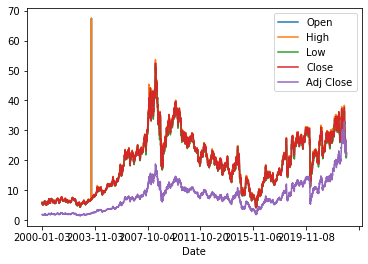

In [ ]:
cotacoes_petr.plot();

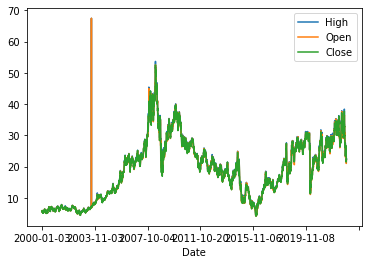

In [ ]:
cotacoes_petr[['High', 'Open', 'Close']].plot();

E se quiséssemos dar um 'zoom' em datas mais recentes?

Por exemplo, nos 100 pregões mais recentes?

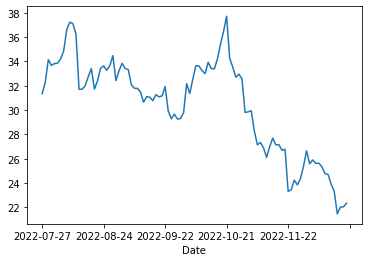

In [ ]:
cotacoes_petr.tail(100).Close.plot();

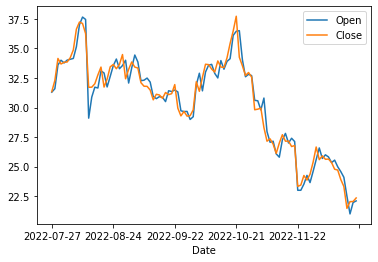

In [ ]:
cotacoes_petr.tail(100)[['Open', 'Close']].plot();

Podemos também utilizar o operador slicing

In [ ]:
cotacoes_petr[0:10]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536
2000-01-10,5.613,5.613,5.613,5.613,1.788543
2000-01-11,5.475,5.475,5.475,5.475,1.744570
2000-01-12,5.483,5.483,5.483,5.483,1.747119
2000-01-13,5.325,5.325,5.325,5.325,1.696774


In [ ]:
cotacoes_petr[:-1]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999


In [ ]:
cotacoes_petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


In [ ]:
cotacoes_petr[-3:]

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


## 2.3. Acessar células específicas do dataframe: filtros simples e shift

Imagine que você trabalha precisa selecionar alguns valores de OHLC para dias específicos. Como você poderia fazer?

É para resolver problemas assim que existem os métodos .loc e .iloc. Como eles funcionam?

Uma das ideias desses métodos é de possibilitar um filtro nos nossos dados para obter uma linha ou célula específicas.

In [ ]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


### 2.3.1. O método .loc

O .loc é utilizado quando o filtro deve ser feito com a métrica em uso no índice do nosso dataframe.

Por exemplo, a métrica utilizada como índice no nosso dataframe é data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.

Imagine que o seu gestor te perguntou quais eram os valores de OHLC de PETR4 no dia 26/05/21

Você poderia ter feito assim:

In [ ]:
cotacoes_petr.loc['2021-05-26']

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

In [ ]:
pd.DataFrame(cotacoes_petr.loc['2021-05-26'])

,2021-05-26
Open,25.910000
High,26.180000
Low,25.650000
Close,26.090000
Adj Close,12.809803


In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-05-26']

In [ ]:
petr_filtrada

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

Para obter os dados entre duas datas específicas

In [ ]:
petr_filtrada = cotacoes_petr.loc['2020-01-01':'2021-05-26']

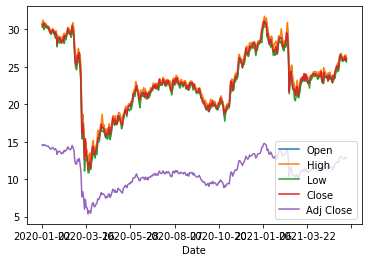

In [ ]:
petr_filtrada.plot();

Embora mais usualmente usados em relação ao index, esses métodos também podem ser usados para acessar não apenas linhas mas colunas

In [ ]:
petr_filtrada = cotacoes_petr.loc['2020-01-01':'2021-05-26', 'Close']

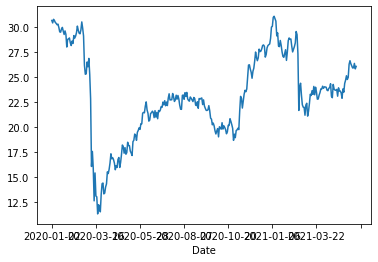

In [ ]:
petr_filtrada.plot();

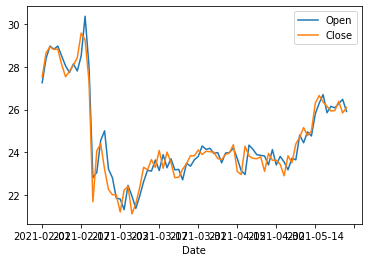

In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-02-01':'2021-05-26', ['Open','Close']]
petr_filtrada.plot();

Filtrando a partir de uma data específica e indo até o último dia disponível

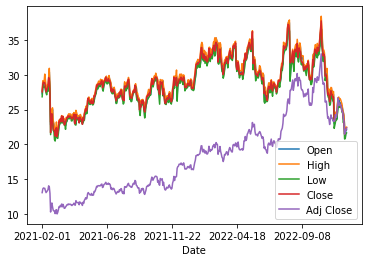

In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-02-01':]
petr_filtrada.plot();

Obtendo os dados desde o início e indo até uma data limite específica, nesse caso 26/03/2017

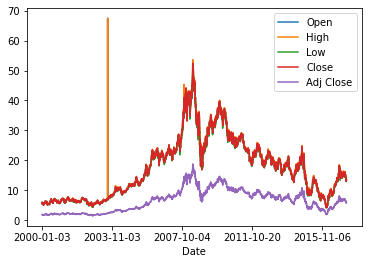

In [ ]:
petr_filtrada = cotacoes_petr.loc[:'2017-03-26']
petr_filtrada.plot();

In [ ]:
petr_filtrada

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536
...,...,...,...,...,...
2017-03-20,12.980,13.670,12.910,13.600,5.992942
2017-03-21,13.610,13.630,12.820,13.000,5.728547
2017-03-22,13.200,13.720,13.030,13.660,6.019381


### 2.3.2. O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

Por exemplo, caso você precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 até a linha 500.

Exemplos:

Obtendo a linha 0 (primeira linha, excluindo o cabeçalho)

In [ ]:
cotacoes_petr.iloc[0]

Open         5.875000
High         5.875000
Low          5.875000
Close        5.875000
Adj Close    1.872027
Name: 2000-01-03, dtype: float64

In [ ]:
cotacoes_petr.iloc[1]

Open         5.550000
High         5.550000
Low          5.550000
Close        5.550000
Adj Close    1.768469
Name: 2000-01-04, dtype: float64

In [ ]:
cotacoes_petr.iloc[200]

Open         6.487500
High         6.487500
Low          6.487500
Close        6.487500
Adj Close    2.067196
Name: 2000-10-09, dtype: float64

Obtendo a última linha

In [ ]:
cotacoes_petr.iloc[-1]

Open         22.100000
High         22.469999
Low          21.639999
Close        22.350000
Adj Close    22.350000
Name: 2022-12-19, dtype: float64

Obtendo da linha 20 até a linha 200 (lembrando também da indexação, 200 não inclusiva)

In [ ]:
cotacoes_petr.iloc[20:200]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-31,5.10100,5.10100,5.10100,5.10100,1.625398
2000-02-01,5.20000,5.20000,5.20000,5.20000,1.656944
2000-02-02,5.30000,5.30000,5.30000,5.30000,1.688808
2000-02-03,5.45000,5.45000,5.45000,5.45000,1.736604
2000-02-04,5.58800,5.58800,5.58800,5.58800,1.780577
...,...,...,...,...,...
2000-10-02,6.52500,6.52500,6.52500,6.52500,2.079145
2000-10-03,6.55125,6.55125,6.55125,6.55125,2.087510
2000-10-04,6.62500,6.62500,6.62500,6.62500,2.111010


In [ ]:
petr_filtrada = cotacoes_petr.iloc[20:200]

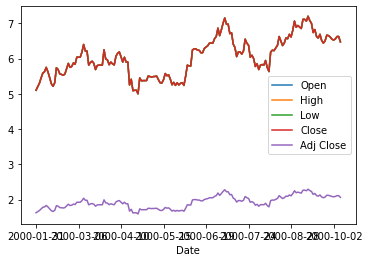

In [ ]:
petr_filtrada.plot();

Obtendo todas as linhas até a linha 100 (linha 100 não entra)

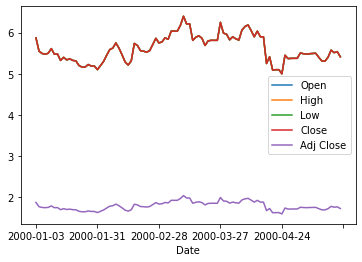

In [ ]:
petr_filtrada = cotacoes_petr.iloc[:100]
petr_filtrada.plot();

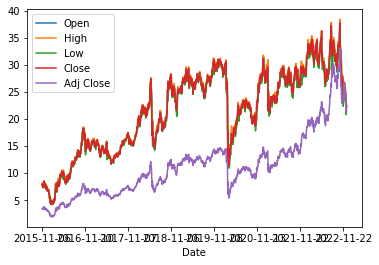

In [ ]:
petr_filtrada = cotacoes_petr.iloc[4000:]
petr_filtrada.plot();

Da mesma que fizemos com o loc, incluindo o filtro de linhas e colunas no iloc

In [ ]:
cotacoes_petr.iloc[0:5, [0,3,4]]

,Open,Close,Adj Close
Date,,,
2000-01-03,5.875,5.875,1.872027
2000-01-04,5.550,5.550,1.768469
2000-01-05,5.494,5.494,1.750625
2000-01-06,5.475,5.475,1.744570
2000-01-07,5.500,5.500,1.752536


In [ ]:
cotacoes_petr.iloc[0:5, 2:4]

,Low,Close
Date,,
2000-01-03,5.875,5.875
2000-01-04,5.550,5.550
2000-01-05,5.494,5.494
2000-01-06,5.475,5.475
2000-01-07,5.500,5.500


Também conseguimos fazer filtro de várias colunas usando o loc

Vazio incluindo todas as linhas

In [ ]:
cotacoes_petr.loc[:,['Open','Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-04,5.550000,5.550000
2000-01-05,5.494000,5.494000
2000-01-06,5.475000,5.475000
2000-01-07,5.500000,5.500000
...,...,...
2022-12-13,24.100000,23.320000
2022-12-14,22.500000,21.469999
2022-12-15,21.000000,22.040001


Vazio incluindo todas as linhas de duas em duas

In [ ]:
cotacoes_petr.loc[::2,['Open','Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-05,5.494000,5.494000
2000-01-07,5.500000,5.500000
2000-01-11,5.475000,5.475000
2000-01-13,5.325000,5.325000
...,...,...
2022-12-06,25.820000,25.639999
2022-12-08,25.549999,24.780001
2022-12-12,24.580000,23.910000


Invertendo os dados de trás pra frente

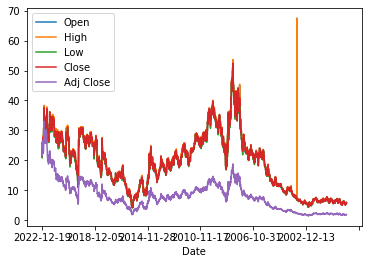

In [ ]:
petr_invertida = cotacoes_petr.iloc[::-1]

petr_invertida.plot();

### 2.3.3. O método .shift

Permite acessar linhas anteriores, extramamente útil em dados séries temporais.

Ex., criar uma coluna com o fechamento do dia anterior

In [ ]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


In [ ]:
cotacoes_petr['Close']

Date
2000-01-03     5.875000
2000-01-04     5.550000
2000-01-05     5.494000
2000-01-06     5.475000
2000-01-07     5.500000
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Close, Length: 5770, dtype: float64

In [ ]:
cotacoes_petr['Close'].shift(2)

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05     5.875000
2000-01-06     5.550000
2000-01-07     5.494000
                ...    
2022-12-13    24.709999
2022-12-14    23.910000
2022-12-15    23.320000
2022-12-16    21.469999
2022-12-19    22.040001
Name: Close, Length: 5770, dtype: float64

In [ ]:
cotacoes_petr['Close_anterior'] = cotacoes_petr['Close'].shift(1)

In [ ]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475


Ou a máxima do proximo dia...

In [ ]:
cotacoes_petr['Close'].shift(-1)

Date
2000-01-03     5.550000
2000-01-04     5.494000
2000-01-05     5.475000
2000-01-06     5.500000
2000-01-07     5.613000
                ...    
2022-12-13    21.469999
2022-12-14    22.040001
2022-12-15    22.049999
2022-12-16    22.350000
2022-12-19          NaN
Name: Close, Length: 5770, dtype: float64

In [ ]:
 cotacoes_petr['Max_proximo_dia'] = cotacoes_petr['High'].shift(-1)

In [ ]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior,Max_proximo_dia
Date,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN,5.550
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875,5.494
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550,5.475
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494,5.500
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475,5.613


## 2.4. Índices: explorando as séries temporais com index datetime

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('PETR4.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


In [ ]:
petr = pd.read_csv('PETR4.csv', index_col = 'Date')

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [ ]:
petr.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
petr.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
       '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19'],
      dtype='object', name='Date', length=5770)

Observe que mesmo parecendo um index datetime, o dtype mostra que não está sendo reconhecido como uma data

In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=5770, freq=None)

Se nenhum timezone está delimitado ainda, utilize o 'tz_localize'

In [ ]:
petr.index = petr.index.tz_localize('UTC')

In [ ]:
petr.index

DatetimeIndex(['2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               '2000-01-11 00:00:00+00:00', '2000-01-12 00:00:00+00:00',
               '2000-01-13 00:00:00+00:00', '2000-01-14 00:00:00+00:00',
               ...
               '2022-12-06 00:00:00+00:00', '2022-12-07 00:00:00+00:00',
               '2022-12-08 00:00:00+00:00', '2022-12-09 00:00:00+00:00',
               '2022-12-12 00:00:00+00:00', '2022-12-13 00:00:00+00:00',
               '2022-12-14 00:00:00+00:00', '2022-12-15 00:00:00+00:00',
               '2022-12-16 00:00:00+00:00', '2022-12-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5770, freq=None)

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00+00:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04 00:00:00+00:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05 00:00:00+00:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06 00:00:00+00:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07 00:00:00+00:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13 00:00:00+00:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14 00:00:00+00:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15 00:00:00+00:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Quando já existe um timezone, utilize o 'tz_convert'

In [ ]:
petr.index = petr.index.tz_convert('America/Sao_Paulo')

In [ ]:
petr.index

DatetimeIndex(['2000-01-02 22:00:00-02:00', '2000-01-03 22:00:00-02:00',
               '2000-01-04 22:00:00-02:00', '2000-01-05 22:00:00-02:00',
               '2000-01-06 22:00:00-02:00', '2000-01-09 22:00:00-02:00',
               '2000-01-10 22:00:00-02:00', '2000-01-11 22:00:00-02:00',
               '2000-01-12 22:00:00-02:00', '2000-01-13 22:00:00-02:00',
               ...
               '2022-12-05 21:00:00-03:00', '2022-12-06 21:00:00-03:00',
               '2022-12-07 21:00:00-03:00', '2022-12-08 21:00:00-03:00',
               '2022-12-11 21:00:00-03:00', '2022-12-12 21:00:00-03:00',
               '2022-12-13 21:00:00-03:00', '2022-12-14 21:00:00-03:00',
               '2022-12-15 21:00:00-03:00', '2022-12-18 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=5770, freq=None)

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000


#### Formatação da data

Se quisessemos acessar os dados do índice mas com formatos de data/hora específico. Por ex, apenas o ano...

In [ ]:
petr.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=5770)

In [ ]:
petr.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=5770)

In [ ]:
petr.index.day

Int64Index([ 2,  3,  4,  5,  6,  9, 10, 11, 12, 13,
            ...
             5,  6,  7,  8, 11, 12, 13, 14, 15, 18],
           dtype='int64', name='Date', length=5770)

In [ ]:
petr.index.date

array([datetime.date(2000, 1, 2), datetime.date(2000, 1, 3),
       datetime.date(2000, 1, 4), ..., datetime.date(2022, 12, 14),
       datetime.date(2022, 12, 15), datetime.date(2022, 12, 18)],
      dtype=object)

In [ ]:
petr.index.time

array([datetime.time(22, 0), datetime.time(22, 0), datetime.time(22, 0),
       ..., datetime.time(21, 0), datetime.time(21, 0),
       datetime.time(21, 0)], dtype=object)

In [ ]:
petr.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=5770)

In [ ]:
petr.index.day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Sunday'],
      dtype='object', name='Date', length=5770)

#### Biblioteca datetime

Aliado à biblioteca datetime, a manipulação de data/hora fica mais versátil

In [ ]:
from datetime import datetime, timedelta

In [ ]:
data_atual = '04-01-2022'

In [ ]:
type(data_atual)

str

Convertemos para um objeto datetime

In [ ]:
datetime.strptime(data_atual, "%d-%m-%Y")

datetime.datetime(2022, 1, 4, 0, 0)

Obtendo data e hora do momento atual

In [ ]:
datetime.now()

datetime.datetime(2023, 1, 12, 11, 4, 34, 192257)

In [ ]:
data_hora_atual = datetime.now()

In [ ]:
datetime.strftime(data_hora_atual, "%A")

'Thursday'

In [ ]:
datetime.strftime(data_hora_atual, "%B")

'January'

In [ ]:
datetime.strftime(data_hora_atual, "%C")

'20'

In [ ]:
datetime.strftime(data_hora_atual, "%D")

'01/12/23'

Data composta

In [ ]:
datetime.strftime(data_hora_atual, "%d/%B")

'12/January'

#### Usando o timedelta

In [ ]:
data_200_dias_atras = datetime.now() -  timedelta(days = 200)

In [ ]:
data_200_dias_atras

datetime.datetime(2022, 6, 26, 11, 4, 34, 281534)

In [ ]:
datetime.strftime(data_200_dias_atras, "%D")

'06/26/22'

In [ ]:
datetime.strftime(data_200_dias_atras, "%y")

'22'

#### Usando a Pandas

In [ ]:
data_atual = '01-01-2023'

In [ ]:
data_atual = pd.to_datetime(data_atual, format = "%d-%m-%Y")

In [ ]:
data_atual

Timestamp('2023-01-01 00:00:00')

Podemos criar uma lista de datas especificando o timeframe que queremos. Nesse caso, 'T' = minutos

In [ ]:
pd.date_range('04/01/2023', periods = 5, freq = 'T')

DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:01:00',
               '2023-04-01 00:02:00', '2023-04-01 00:03:00',
               '2023-04-01 00:04:00'],
              dtype='datetime64[ns]', freq='T')

In [ ]:
pd.date_range('04/01/2023', periods = 10, freq = '5T')

DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:05:00',
               '2023-04-01 00:10:00', '2023-04-01 00:15:00',
               '2023-04-01 00:20:00', '2023-04-01 00:25:00',
               '2023-04-01 00:30:00', '2023-04-01 00:35:00',
               '2023-04-01 00:40:00', '2023-04-01 00:45:00'],
              dtype='datetime64[ns]', freq='5T')

Criando variáveis auxiliares

In [ ]:
petr.index

DatetimeIndex(['2000-01-02 22:00:00-02:00', '2000-01-03 22:00:00-02:00',
               '2000-01-04 22:00:00-02:00', '2000-01-05 22:00:00-02:00',
               '2000-01-06 22:00:00-02:00', '2000-01-09 22:00:00-02:00',
               '2000-01-10 22:00:00-02:00', '2000-01-11 22:00:00-02:00',
               '2000-01-12 22:00:00-02:00', '2000-01-13 22:00:00-02:00',
               ...
               '2022-12-05 21:00:00-03:00', '2022-12-06 21:00:00-03:00',
               '2022-12-07 21:00:00-03:00', '2022-12-08 21:00:00-03:00',
               '2022-12-11 21:00:00-03:00', '2022-12-12 21:00:00-03:00',
               '2022-12-13 21:00:00-03:00', '2022-12-14 21:00:00-03:00',
               '2022-12-15 21:00:00-03:00', '2022-12-18 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=5770, freq=None)

In [ ]:
petr.index.time

array([datetime.time(22, 0), datetime.time(22, 0), datetime.time(22, 0),
       ..., datetime.time(21, 0), datetime.time(21, 0),
       datetime.time(21, 0)], dtype=object)

In [ ]:
petr['Horario'] = petr.index

In [ ]:
petr['Horario'] = petr['Horario'].dt.time

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario
Date,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00


In [ ]:
petr['Dia_do_ano'] = petr.index

In [ ]:
petr['Dia_do_ano'] = petr['Dia_do_ano'].dt.dayofyear

In [ ]:
petr.tail()

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia_do_ano
Date,,,,,,,,
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348
2022-12-15 21:00:00-03:00,21.959999,22.110001,21.510000,22.049999,22.049999,90767300,21:00:00,349
2022-12-18 21:00:00-03:00,22.100000,22.469999,21.639999,22.350000,22.350000,37837300,21:00:00,352


#### Método resample

E por fim, o método resample. Ele permite agrupar timeframes menores para criar um conjunto de dados agrupado. Nesse exemplo, vamos converter os dados diários em dados mensais

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia_do_ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000,22:00:00,6
...,...,...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348


In [ ]:
petr_month = petr.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last','Volume':'sum' })

In [ ]:
petr_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31 00:00:00-02:00,5.875,5.875,5.101,5.200,545825280000
2000-02-29 00:00:00-03:00,5.300,5.875,5.213,5.875,525306880000
2000-03-31 00:00:00-03:00,5.838,6.399,5.688,5.900,384163840000
2000-04-30 00:00:00-03:00,5.850,6.188,5.000,5.376,582123520000
2000-05-31 00:00:00-03:00,5.506,5.575,5.238,5.500,550553600000


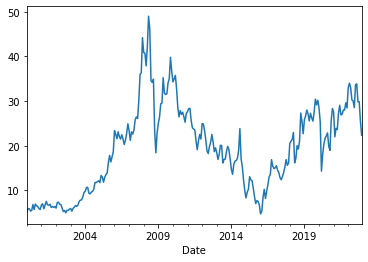

In [ ]:
petr_month.Close.plot();

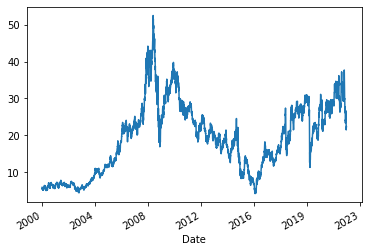

In [ ]:
petr.Close.plot();

## 2.5. Colunas: filtrar, renomear e reordenar

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia_do_ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00,6


In [ ]:
petr.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Horario',
       'Dia_do_ano'],
      dtype='object')

In [ ]:
list(petr.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Horario',
 'Dia_do_ano']

Vamos retomar apenas as colunas originais OHLCV dos dados

In [ ]:
petr[['Open', 'High', 'Low', 'Close']]

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


In [ ]:
petr_filtrada = petr[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']]

In [ ]:
petr_filtrada

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [ ]:
petr_filtrada

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


E agora as 4 primeiras

In [ ]:
petr_filtrada = petr_filtrada.iloc[:, 0:4]

#### Renomeando colunas

Duas formas de renomear as colunas

In [ ]:
petr_filtrada.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
petr_filtrada.columns = ['Abertura', 'Máxima', 'Mínima', 'Fechamento']

In [ ]:
petr_filtrada.head()

,Abertura,Máxima,Mínima,Fechamento
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


Usamos um dicionário para renomear as colunas, contendo a estrutura {'nome antigo' : 'novo nome'}

In [ ]:
dicionario = {'Abertura' : 'Open', 'Máxima' : 'High', 'Mínima' : 'Low', 'Fechamento' : 'Close'}

In [ ]:
petr_filtrada.rename(dicionario, axis = 1)

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


In [ ]:
petr_filtrada

,Abertura,Máxima,Mínima,Fechamento
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


In [ ]:
petr_filtrada = petr_filtrada.rename(dicionario, axis = 1)

Também podemos passar o dicionário inteiro

In [ ]:
petr_filtrada = petr_filtrada.rename( {'Abertura' : 'Open', 'Máxima' : 'High', 'Mínima' : 'Low', 'Fechamento' : 'Close'} , axis = 1)

In [ ]:
petr_filtrada.head()

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


#### Reordenar as colunas

In [ ]:
list(petr_filtrada.columns)

['Open', 'High', 'Low', 'Close']

In [ ]:
petr_filtrada[['Open', 'Close', 'Low', 'High']]

,Open,Close,Low,High
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,23.320000,23.309999,24.200001
2022-12-13 21:00:00-03:00,22.500000,21.469999,20.770000,22.600000
2022-12-14 21:00:00-03:00,21.000000,22.040001,20.830000,22.370001


#### Adicionando novas colunas em posições específicas

Também podemos inserir uma nova coluna não necessariamente como a última (padrão), mas especificando qual a posição, o nome e os dados em si

In [ ]:
dados_nova_col = 'PETR4'

In [ ]:
petr_filtrada.insert(0, 'Ativo', dados_nova_col)

In [ ]:
petr_filtrada

,Ativo,Open,High,Low,Close
Date,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,PETR4,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,PETR4,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,PETR4,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,PETR4,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...,...
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001


Método assign

Outra forma menos usual mas que pode ser útil para criar novas colunas é através do .assign

In [ ]:
petr_filtrada['Close'] - petr_filtrada['Open']

Date
2000-01-02 22:00:00-02:00    0.000000
2000-01-03 22:00:00-02:00    0.000000
2000-01-04 22:00:00-02:00    0.000000
2000-01-05 22:00:00-02:00    0.000000
2000-01-06 22:00:00-02:00    0.000000
                               ...   
2022-12-12 21:00:00-03:00   -0.780001
2022-12-13 21:00:00-03:00   -1.030001
2022-12-14 21:00:00-03:00    1.040001
2022-12-15 21:00:00-03:00    0.090000
2022-12-18 21:00:00-03:00    0.250000
Length: 5770, dtype: float64

In [ ]:
petr_filtrada.assign(resultado = (petr_filtrada['Close'] - petr_filtrada['Open']) ).tail()

,Ativo,Open,High,Low,Close,resultado
Date,,,,,,
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000,-0.780001
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999,-1.030001
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001,1.040001
2022-12-15 21:00:00-03:00,PETR4,21.959999,22.110001,21.510000,22.049999,0.090000
2022-12-18 21:00:00-03:00,PETR4,22.100000,22.469999,21.639999,22.350000,0.250000


## 2.6. Dataframes mais complexos, incluindo multi-index

#### Lista dos ativos do IBOV

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV, acesse o link: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compõem o IBOV são os seguintes:

["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

Vamos transformar isso agora numa lista

In [ ]:
tickers_IBOV = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

In [ ]:
tickers_IBOV.sort()

In [ ]:
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

PONTO IMPORTANTE

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Como acrescentar ".SA" ao fim do nome de um papel?

Veja o raciocínio abaixo:

In [ ]:
acao = 'PETR4'

In [ ]:
acao + '.SA'

'PETR4.SA'

Precisamos então criar uma estrutura que faça isso para todos os papéis de uma vez

In [ ]:
tickers_IBOV_SA = [i + '.SA' for i in tickers_IBOV]

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados da Yahoo Finance)

**DISCLAIMER**

Caso a yfinance apresente problemas, utilize o .csv que será disponibilizado (detalhes abaixo neste código)

#### Instalação e abertura da yfinance, importação de dados

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
yf.download('VALE3.SA', start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,89.349998,91.480003,88.849998,91.459999,70.937431,37865500
2021-01-05,91.459999,93.000000,90.519997,93.000000,72.131866,34300300
2021-01-06,94.980003,96.349998,94.400002,96.050003,74.497482,53722500
2021-01-07,96.610001,102.529999,96.610001,102.320000,79.360558,74541400
2021-01-08,103.010002,103.349998,98.199997,102.000000,79.112366,58562700
...,...,...,...,...,...,...
2021-12-23,79.949997,80.059998,78.800003,79.150002,72.218056,13121200
2021-12-27,78.870003,79.449997,78.260002,78.949997,72.035568,11371400
2021-12-28,78.510002,78.529999,76.570000,77.050003,70.301979,18923700


#### **Extração para vários ativos de uma vez**

Observe a estrutura dos dados acima. Temos Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. Podemos reproduzir a mesma estrutura caso queiramos obter dados de vários papéis ao mesmo tempo.

In [ ]:
yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%***********************]  91 of 91 completed


Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085718  41.191307  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.769398        NaN  36.669998   
2021-01-07  14.604378  38.273800  65.984634  60.692226        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830448        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385452  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590393  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484875  32.590824  17.390411  19.593056  ...   3897800   
2021-01-05  18.521254  32.252693  17.307266  19.473597  ...   8506600   
2021-01-06  18.218122  32.989647  17.742346  20.119013  ...   9998400   
2021-01-07  18.727379  34.298832  18.177425  20.653143  ...  11072300   
2021-01-08  19.003227  34.498241  18.037319  20.475100  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.918274  27.293530  13.814719  16.406240  ...   2893300   
2021-12-27  10.851114  27.349573  13.959241  16.593842  ...   7282600   
2021-12-28  10.707200  27.190783  13.950742  16.534145  ...   3367300   
2021-12-29  10.630445  27.050669  13.848722  16.457405  ...   2589100   
2021-12-30  10.688010  26.947922  13.763707  16.380659  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [ ]:
cotacoes_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%***********************]  91 of 91 completed


#### **Caso a biblioteca yfinance não esteja funcionando**

In [ ]:
import pandas as pd

Siga os passos abaixo para abrir o arquivo .csv que disponibilizamos com os dados OHLC dos papéis do IBOV

In [ ]:
# Não é necessário rodar esta célula, este comando foi gerado durante a aula apenas para exportar o dataframe
cotacoes_ibov.to_csv('cotacoes_ibov.csv')

Utilize o arquivo fornecido nesta aula (cotacoes_ibov.csv)

In [ ]:
cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)

In [ ]:
cotacoes_ibov = cotacoes_csv

#### Caso a yfinance esteja funcionando normalmente, basta continuar a rotina

In [ ]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=546)

Para facilitar nossa vida, podemos obter apenas os dados da coluna **Adj Close** para todos os papéis de uma vez

In [ ]:
adjclose_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")['Adj Close']

[*********************100%***********************]  91 of 91 completed


In [ ]:
adjclose_ibov

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.085718,41.191307,73.699677,65.592361,NaN,37.730000,18.484875,32.590820,17.390419,19.593052,...,13.305785,27.178003,22.572636,13.088719,70.937431,19.035427,16.170000,39.802071,36.239864,33.214291
2021-01-05,14.385996,41.211086,72.052757,64.589188,NaN,38.200001,18.521254,32.252689,17.307268,19.473597,...,13.001494,27.050730,22.385466,13.228893,72.131866,19.253223,16.219999,39.464172,38.464169,33.380360
2021-01-06,14.677172,38.966091,67.347267,60.769394,NaN,36.669998,18.218121,32.989647,17.742344,20.119005,...,12.641879,25.768194,22.114069,13.868435,74.497490,18.974445,15.490000,39.022320,39.484058,32.051796
2021-01-07,14.604378,38.273800,65.984634,60.692223,NaN,36.049999,18.727381,34.298828,18.177425,20.653143,...,12.439018,25.699661,22.787878,14.534259,79.360558,19.322918,15.080000,38.034634,41.115868,32.452316
2021-01-08,15.041146,40.251770,70.582291,61.830441,NaN,36.599998,19.003231,34.498238,18.037313,20.475103,...,13.001494,27.412970,23.377462,14.464173,79.112366,19.863052,15.530000,39.030979,43.602444,33.556202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,14.771684,36.379086,30.124914,72.385452,13.949898,26.459999,10.918274,27.293530,13.814718,16.406242,...,12.282348,28.287695,13.673858,14.098693,72.218056,20.026421,4.500000,45.335293,32.883453,20.177137
2021-12-27,14.752684,36.488602,31.271875,73.107651,13.504373,25.670000,10.851114,27.349573,13.959240,16.593836,...,12.301435,28.356594,13.951743,14.269472,72.035568,20.283413,4.860000,45.062569,32.588707,19.919092
2021-12-28,14.743185,36.588161,30.419008,73.293076,12.969742,25.750000,10.707200,27.190784,13.950741,16.534149,...,12.177370,27.874306,13.999653,13.994329,70.301979,20.435705,4.950000,44.861111,32.706604,20.703154


Visualização dos rótulos de cada nível

In [ ]:
set(cotacoes_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [ ]:
set(cotacoes_ibov.columns.get_level_values(1))

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3

Poderiamos "dropar" o index 0 para nao sermos multi-index. Nesse exemplo não faria tanto sentido pois perderiamos o parâmetro base OHLCV. Mas pode ser muito útil em outras tabelas

In [ ]:
cotacoes_ibov.droplevel(0, axis = 1)

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.085717,41.191307,73.699677,65.592361,NaN,37.730000,18.484877,32.590824,17.390415,19.593056,...,3897800,5429700,5472800,20687900,37865500,3953500,44372400,2791400,7219800,2640400
2021-01-05,14.385996,41.211086,72.052757,64.589180,NaN,38.200001,18.521254,32.252697,17.307270,19.473597,...,8506600,4430700,5428300,18302900,34300300,12993100,41436700,2899200,16633600,3703500
2021-01-06,14.677172,38.966091,67.347267,60.769394,NaN,36.669998,18.218119,32.989651,17.742342,20.119013,...,9998400,5512800,6564800,23592900,53722500,10884000,49797300,5790100,21507400,5004000
2021-01-07,14.604377,38.273800,65.984634,60.692223,NaN,36.049999,18.727377,34.298828,18.177427,20.653143,...,11072300,3322500,5638900,22298600,74541400,6954300,70842700,5213500,15129600,6138600
2021-01-08,15.041145,40.251770,70.582291,61.830448,NaN,36.599998,19.003229,34.498238,18.037306,20.475100,...,5816400,8427300,4449400,23237000,58562700,8434100,58505800,2916600,17381000,2685800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,14.771684,36.379086,30.124914,72.385445,13.949898,26.459999,10.918273,27.293528,13.814720,16.406240,...,2893300,2731000,2238400,10681800,13121200,3932100,30613400,1382200,2166400,1731000
2021-12-27,14.752684,36.488602,31.271875,73.107651,13.504373,25.670000,10.851114,27.349575,13.959241,16.593842,...,7282600,3040900,5340800,10504500,11371400,4196700,35550300,1492300,4457200,1809000
2021-12-28,14.743185,36.588161,30.419008,73.293076,12.969742,25.750000,10.707199,27.190781,13.950740,16.534145,...,3367300,3269600,3777100,13201600,18923700,3743000,25433400,1060000,3670800,1710500


Filtrar apenas o índice que contém os preços de Adj Close

In [ ]:
cotacoes_ibov_adj_close = cotacoes_ibov['Adj Close']

In [ ]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=546)

Filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo (acaba sendo uma única coluna).

Como é apenas uma coluna, ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca pandas


In [ ]:
cotacoes_ibov_adjclose_abev = cotacoes_ibov[('Adj Close', 'ABEV3.SA')]

In [ ]:
cotacoes_ibov_adjclose_abev

Date
2021-01-04    14.085717
2021-01-05    14.385996
2021-01-06    14.677172
2021-01-07    14.604377
2021-01-08    15.041145
                ...    
2021-12-23    14.771684
2021-12-27    14.752684
2021-12-28    14.743185
2021-12-29    14.676688
2021-12-30    14.648190
Name: (Adj Close, ABEV3.SA), Length: 247, dtype: float64

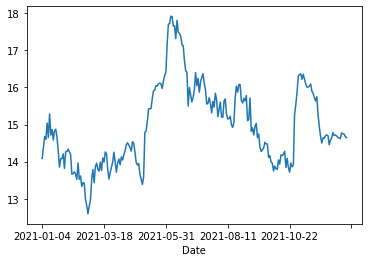

In [ ]:
cotacoes_ibov_adjclose_abev.plot();

Usando pd.DataFrame podemos reconfigurar como dataframe

In [ ]:
cotacoes_ibov_adjclose_abev = pd.DataFrame(cotacoes_ibov_adjclose_abev)

In [ ]:
cotacoes_ibov_adjclose_abev

,Adj Close
,ABEV3.SA
Date,
2021-01-04,14.085717
2021-01-05,14.385996
2021-01-06,14.677172
2021-01-07,14.604377
2021-01-08,15.041145
...,...
2021-12-23,14.771684
2021-12-27,14.752684


## 2.7. Manejo dos NAs e NaN

### 2.7.1. Checar o número de NaN do dataset

O método mais básico para lidar com missings é o isna()

Ele retorna um booleano (True/False).

In [ ]:
cotacoes_ibov.isna()

Adj Close                                                        \
            ABEV3.SA ALPA4.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                         
2021-01-04     False    False    False    False     True    False    False   
2021-01-05     False    False    False    False     True    False    False   
2021-01-06     False    False    False    False     True    False    False   
2021-01-07     False    False    False    False     True    False    False   
2021-01-08     False    False    False    False     True    False    False   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23     False    False    False    False    False    False    False   
2021-12-27     False    False    False    False    False    False    False   
2021-12-28     False    False    False    False    False    False    False   
2021-12-29     False    False    False    False    False    False    False   
2021-12-30     False    False    False    False    False    False    False   

                                       ...   Volume                    \
           BBAS3.SA BBDC3.SA BBDC4.SA  ... TIMS3.SA TOTS3.SA UGPA3.SA   
Date                                   ...                              
2021-01-04    False    False    False  ...    False    False    False   
2021-01-05    False    False    False  ...    False    False    False   
2021-01-06    False    False    False  ...    False    False    False   
2021-01-07    False    False    False  ...    False    False    False   
2021-01-08    False    False    False  ...    False    False    False   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-23    False    False    False  ...    False    False    False   
2021-12-27    False    False    False  ...    False    False    False   
2021-12-28    False    False    False  ...    False    False    False   
2021-12-29    False    False    False  ...    False    False    False   
2021-12-30    False    False    False  ...    False    False    False   

                                                                           
           USIM5.SA VALE3.SA VBBR3.SA VIIA3.SA VIVT3.SA WEGE3.SA YDUQ3.SA  
Date                                                                       
2021-01-04    False    False    False    False    False    False    False  
2021-01-05    False    False    False    False    False    False    False  
2021-01-06    False    False    False    False    False    False    False  
2021-01-07    False    False    False    False    False    False    False  
2021-01-08    False    False    False    False    False    False    False  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-23    False    False    False    False    False    False    False  
2021-12-27    False    False    False    False    False    False    False  
2021-12-28    False    False    False    False    False    False    False  
2021-12-29    False    False    False    False    False    False    False  
2021-12-30    False    False    False    False    False    False    False  

[247 rows x 546 columns]

Como vimos, no Python o True equivale a 1 e False equivale a 0. Se eu somar uma coluna/linha composta por True/False eu consigo saber quantos True existem (e nesse caso do .isna, saber qts NAs existem)

O método sum() = sum(0), já que 0 é o default do método e representa a soma de todos as células de uma coluna.

Se colocarmos sum(1), teremos a soma de todas as celulas de uma linha

In [ ]:
cotacoes_ibov.isna().sum()

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ARZZ3.SA     0
           ASAI3.SA    37
                       ..
Volume     VBBR3.SA     0
           VIIA3.SA     0
           VIVT3.SA     0
           WEGE3.SA     0
           YDUQ3.SA     0
Length: 546, dtype: int64

In [ ]:
count_null = cotacoes_ibov.isna().sum()

In [ ]:
count_null.head(25)

Adj Close  ABEV3.SA      0
           ALPA4.SA      0
           AMER3.SA      0
           ARZZ3.SA      0
           ASAI3.SA     37
           AZUL4.SA      0
           B3SA3.SA      0
           BBAS3.SA      0
           BBDC3.SA      0
           BBDC4.SA      0
           BBSE3.SA      0
           BEEF3.SA      0
           BPAC11.SA     0
           BPAN4.SA      0
           BRAP4.SA      0
           BRFS3.SA      0
           BRKM5.SA      0
           BRML3.SA      0
           CASH3.SA      0
           CCRO3.SA      0
           CIEL3.SA      0
           CMIG4.SA      0
           CMIN3.SA     32
           COGN3.SA      0
           CPFE3.SA      0
dtype: int64

ASAI3 possui 37 células com NA. Começou a ser negociada no IBOV em março apenas

CMIN3 possui 32

Soma dos NAs por linhas. Primeira linha 24 NAs.

Lembrando que uma linha é composta por 6 índices 0 (Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume),

podemos concluir que existem 4 ativos (24/6) com NA na primeira linha

In [ ]:
count_null_linha = cotacoes_ibov.isna().sum(1)

O atributo shape retorna o número de linhas e coluna de um dataframe

In [ ]:
cotacoes_ibov.shape

(247, 546)

In [ ]:
cotacoes_ibov.shape[0]

247

In [ ]:
cotacoes_ibov.shape[1]

546

In [ ]:
len(cotacoes_ibov.columns)

546

Medir o % de missings

In [ ]:
count_null/cotacoes_ibov.shape[0]

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           AMER3.SA    0.000000
           ARZZ3.SA    0.000000
           ASAI3.SA    0.149798
                         ...   
Volume     VBBR3.SA    0.000000
           VIIA3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 546, dtype: float64

Usando as informações do shape e do isna, podemos fazer um filtro para retornar quais linhas (cotacoes_IBOV.shape[0]) ou colunas cotacoes_IBOV.shape[1] possuem uma fração específica de NAs

No exemplo, exibir as linhas onde temos pelo menos 1 NA

In [ ]:
cotacoes_ibov.isna().sum(1)>0

Date
2021-01-04     True
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
              ...  
2021-12-23    False
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
Length: 247, dtype: bool

In [ ]:
cotacoes_ibov[ cotacoes_ibov.isna().sum(1)>0 ]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.692223        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830448        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-11-12  16.008812  41.605968  36.663582  75.543770  15.375579  28.760000   
2021-11-16  16.008812  40.301735  33.448162  71.323235  14.692440  27.690001   
2021-11-17  16.036240  40.819447  32.585491  68.312714  14.118208  27.799999   
2021-11-18  16.091097  42.840504  32.722736  70.664993  13.840991  27.360001   
2021-11-19  15.899098  42.860416  32.908993  73.578712  13.939998  27.760000   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590824  17.390415  19.593056  ...   3897800   
2021-01-05  18.521254  32.252697  17.307270  19.473597  ...   8506600   
2021-01-06  18.218119  32.989651  17.742342  20.119013  ...   9998400   
2021-01-07  18.727377  34.298828  18.177427  20.653143  ...  11072300   
2021-01-08  19.003229  34.498238  18.037306  20.475100  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-11-12  12.363007  27.629707  14.885600  17.409781  ...   5218800   
2021-11-16  12.078800  27.244818  14.852070  17.384542  ...   4817400   
2021-11-17  11.993538  26.859924  14.902362  17.460270  ...   4152900   
2021-11-18  11.813540  26.658316  14.717965  17.291979  ...   3876300   
2021-11-19  11.813540  26.621658  14.743112  17.275150  ...  14357600   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-11-12  3167800  9157700  24352900  24542500  10768600  64161900  1639100   
2021-11-16  2999200  8675100  18759800  17207900  12075000  55845900  1697700   
2021-11-17  2805600  8205400  18261100  25487600  12458600  53555400  2654600   
2021-11-18  3281700  9715400  27993300  51343900   7494400  34960300  1926400   
2021-11-19  2859600  8008200  25978000  26849500   7465500  47654800  5553100   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-11-12   6540200  1674500  
2021-11-16   6011000  2994400  
2021-11-17   6058200  3880200  
2021-11-18   4434200  2301400  
2021-11-19   4636600  4290000  

[219 rows x 546 columns]

Vamos retornar apenas as linhas que tenham integridade, ou não-missings de pelo menos 90%

In [ ]:
cotacoes_ibov.shape[0]

247

In [ ]:
len(cotacoes_ibov)

247

In [ ]:
count_null/cotacoes_ibov.shape[0]

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           AMER3.SA    0.000000
           ARZZ3.SA    0.000000
           ASAI3.SA    0.149798
                         ...   
Volume     VBBR3.SA    0.000000
           VIIA3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 546, dtype: float64

In [ ]:
cotacoes_ibov.isna().sum(0)/len(cotacoes_ibov)

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           AMER3.SA    0.000000
           ARZZ3.SA    0.000000
           ASAI3.SA    0.149798
                         ...   
Volume     VBBR3.SA    0.000000
           VIIA3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 546, dtype: float64

In [ ]:
cotacoes_ibov.isna().sum(0)/len(cotacoes_ibov) < 0.1

Adj Close  ABEV3.SA     True
           ALPA4.SA     True
           AMER3.SA     True
           ARZZ3.SA     True
           ASAI3.SA    False
                       ...  
Volume     VBBR3.SA     True
           VIIA3.SA     True
           VIVT3.SA     True
           WEGE3.SA     True
           YDUQ3.SA     True
Length: 546, dtype: bool

Agora um filtro de NA mais complexo, onde os NAs representem mais de 50% dos dados de uma linha (NAs da linha/total de colunas > 0.5).

Vemos que nenhuma linha possui tantos NAs

In [ ]:
cotacoes_ibov.isna().sum(0)

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ARZZ3.SA     0
           ASAI3.SA    37
                       ..
Volume     VBBR3.SA     0
           VIIA3.SA     0
           VIVT3.SA     0
           WEGE3.SA     0
           YDUQ3.SA     0
Length: 546, dtype: int64

In [ ]:
cotacoes_ibov.isna().sum(1)

Date
2021-01-04    24
2021-01-05    24
2021-01-06    24
2021-01-07    24
2021-01-08    24
              ..
2021-12-23     0
2021-12-27     0
2021-12-28     0
2021-12-29     0
2021-12-30     0
Length: 247, dtype: int64

In [ ]:
len(cotacoes_ibov.columns)

546

In [ ]:
cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)

Date
2021-01-04    0.043956
2021-01-05    0.043956
2021-01-06    0.043956
2021-01-07    0.043956
2021-01-08    0.043956
                ...   
2021-12-23    0.000000
2021-12-27    0.000000
2021-12-28    0.000000
2021-12-29    0.000000
2021-12-30    0.000000
Length: 247, dtype: float64

In [ ]:
(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5

Date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08    False
              ...  
2021-12-23    False
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
Length: 247, dtype: bool

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5]

Empty DataFrame
Columns: [(Adj Close, ABEV3.SA), (Adj Close, ALPA4.SA), (Adj Close, AMER3.SA), (Adj Close, ARZZ3.SA), (Adj Close, ASAI3.SA), (Adj Close, AZUL4.SA), (Adj Close, B3SA3.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC3.SA), (Adj Close, BBDC4.SA), (Adj Close, BBSE3.SA), (Adj Close, BEEF3.SA), (Adj Close, BPAC11.SA), (Adj Close, BPAN4.SA), (Adj Close, BRAP4.SA), (Adj Close, BRFS3.SA), (Adj Close, BRKM5.SA), (Adj Close, BRML3.SA), (Adj Close, CASH3.SA), (Adj Close, CCRO3.SA), (Adj Close, CIEL3.SA), (Adj Close, CMIG4.SA), (Adj Close, CMIN3.SA), (Adj Close, COGN3.SA), (Adj Close, CPFE3.SA), (Adj Close, CPLE6.SA), (Adj Close, CRFB3.SA), (Adj Close, CSAN3.SA), (Adj Close, CSNA3.SA), (Adj Close, CVCB3.SA), (Adj Close, CYRE3.SA), (Adj Close, DXCO3.SA), (Adj Close, ECOR3.SA), (Adj Close, EGIE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELET6.SA), (Adj Close, EMBR3.SA), (Adj Close, ENBR3.SA), (Adj Close, ENEV3.SA), (Adj Close, ENGI11.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FLRY3.SA), (Adj Close, GGBR4.SA), (Adj Close, GOAU4.SA), (Adj Close, GOLL4.SA), (Adj Close, HAPV3.SA), (Adj Close, HYPE3.SA), (Adj Close, IGTI11.SA), (Adj Close, IRBR3.SA), (Adj Close, ITSA4.SA), (Adj Close, ITUB4.SA), (Adj Close, JBSS3.SA), (Adj Close, KLBN11.SA), (Adj Close, LREN3.SA), (Adj Close, LWSA3.SA), (Adj Close, MGLU3.SA), (Adj Close, MRFG3.SA), (Adj Close, MRVE3.SA), (Adj Close, MULT3.SA), (Adj Close, NTCO3.SA), (Adj Close, PCAR3.SA), (Adj Close, PETR3.SA), (Adj Close, PETR4.SA), (Adj Close, PETZ3.SA), (Adj Close, POSI3.SA), (Adj Close, PRIO3.SA), (Adj Close, QUAL3.SA), (Adj Close, RADL3.SA), (Adj Close, RAIL3.SA), (Adj Close, RAIZ4.SA), (Adj Close, RDOR3.SA), (Adj Close, RENT3.SA), (Adj Close, RRRP3.SA), (Adj Close, SANB11.SA), (Adj Close, SBSP3.SA), (Adj Close, SLCE3.SA), (Adj Close, SMTO3.SA), (Adj Close, SOMA3.SA), (Adj Close, SUZB3.SA), (Adj Close, TAEE11.SA), (Adj Close, TIMS3.SA), (Adj Close, TOTS3.SA), (Adj Close, UGPA3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE3.SA), (Adj Close, VBBR3.SA), (Adj Close, VIIA3.SA), (Adj Close, VIVT3.SA), (Adj Close, WEGE3.SA), (Adj Close, YDUQ3.SA), (Close, ABEV3.SA), (Close, ALPA4.SA), (Close, AMER3.SA), (Close, ARZZ3.SA), (Close, ASAI3.SA), (Close, AZUL4.SA), (Close, B3SA3.SA), (Close, BBAS3.SA), (Close, BBDC3.SA), ...]
Index: []

[0 rows x 546 columns]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.5]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.692223        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830448        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590824  17.390415  19.593056  ...   3897800   
2021-01-05  18.521254  32.252697  17.307270  19.473597  ...   8506600   
2021-01-06  18.218119  32.989651  17.742342  20.119013  ...   9998400   
2021-01-07  18.727377  34.298828  18.177427  20.653143  ...  11072300   
2021-01-08  19.003229  34.498238  18.037306  20.475100  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.918273  27.293528  13.814720  16.406240  ...   2893300   
2021-12-27  10.851114  27.349575  13.959241  16.593842  ...   7282600   
2021-12-28  10.707199  27.190781  13.950740  16.534145  ...   3367300   
2021-12-29  10.630445  27.050669  13.848724  16.457405  ...   2589100   
2021-12-30  10.688011  26.947926  13.763710  16.380659  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.2]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.692223        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830448        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590824  17.390415  19.593056  ...   3897800   
2021-01-05  18.521254  32.252697  17.307270  19.473597  ...   8506600   
2021-01-06  18.218119  32.989651  17.742342  20.119013  ...   9998400   
2021-01-07  18.727377  34.298828  18.177427  20.653143  ...  11072300   
2021-01-08  19.003229  34.498238  18.037306  20.475100  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.918273  27.293528  13.814720  16.406240  ...   2893300   
2021-12-27  10.851114  27.349575  13.959241  16.593842  ...   7282600   
2021-12-28  10.707199  27.190781  13.950740  16.534145  ...   3367300   
2021-12-29  10.630445  27.050669  13.848724  16.457405  ...   2589100   
2021-12-30  10.688011  26.947926  13.763710  16.380659  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.03]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-03-01  12.589454  34.960690  79.140396  68.679062  14.047593  40.049999   
2021-03-02  12.790592  35.069477  77.042526  69.286751  14.264013  38.790001   
2021-03-03  12.955160  35.138706  74.650581  68.389687  14.027920  38.560001   
2021-03-04  13.512863  35.702427  73.209518  70.415337  14.401735  38.500000   
2021-03-05  13.787143  36.394718  70.082329  75.710953  14.755877  38.139999   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...   Volume           \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TIMS3.SA TOTS3.SA   
Date                                                    ...                     
2021-03-01  16.475122  24.525627  14.713925  16.525492  ...  7359900  4941700   
2021-03-02  16.978321  25.467564  14.970648  16.970940  ...  7724800  4748200   
2021-03-03  17.154133  25.520382  15.273752  17.119677  ...  7846600  4414300   
2021-03-04  16.820690  26.444715  15.783869  17.781553  ...  5628300  6059000   
2021-03-05  17.123821  26.937695  16.648836  18.621923  ...  5633000  5683200   
...               ...        ...        ...        ...  ...      ...      ...   
2021-12-23  10.918273  27.293528  13.814720  16.406240  ...  2893300  2731000   
2021-12-27  10.851114  27.349575  13.959241  16.593842  ...  7282600  3040900   
2021-12-28  10.707199  27.190781  13.950740  16.534145  ...  3367300  3269600   
2021-12-29  10.630445  27.050669  13.848724  16.457405  ...  2589100  3205000   
2021-12-30  10.688011  26.947926  13.763710  16.380659  ...  7149400  4400600   

                                                                        \
            UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA   VIIA3.SA VIVT3.SA   
Date                                                                     
2021-03-01   6481200  21799400  32798000   8024600   54354500  3500300   
2021-03-02  15115500  20234300  47565800  13887100   90248200  3530600   
2021-03-03  15218400  27774200  41473300  16157100  100482300  4445500   
2021-03-04  17288300  25979600  48492500  14420500   71643500  4121000   
2021-03-05   6870700  22994900  46503300  19372100   48767200  3116300   
...              ...       ...       ...       ...        ...      ...   
2021-12-23   2238400  10681800  13121200   3932100   30613400  1382200   
2021-12-27   5340800  10504500  11371400   4196700   35550300  1492300   
2021-12-28   3777100  13201600  18923700   3743000   25433400  1060000   
2021-12-29   3591300  10525500  12113500   3630700   22334300   930200   
2021-12-30   8871300  12815100  26568500  13547600   58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-03-01  13016200  6072800  
2021-03-02  14454400  6062800  
2021-03-03  13457400  5884400  
2021-03-04  23642800  2664200  
2021-03-05  17301600  2707100  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[210 rows x 546 columns]

#### Método dropna()

Sabendo disso, posso usar o dropna para retirar qualquer linha que seja NA para o ativo CMIN

Usando o argumento inplace nem preciso criar uma nova variável

(ex., cotacoes_IBOV2 que represente dados sem os NAs excluídos)

In [ ]:
cotacoes_ibov.dropna(subset = [('Adj Close', 'ASAI3.SA')], inplace = True)

In [ ]:
cotacoes_ibov.isna().sum()

Adj Close  ABEV3.SA    0
           ALPA4.SA    0
           AMER3.SA    0
           ARZZ3.SA    0
           ASAI3.SA    0
                      ..
Volume     VBBR3.SA    0
           VIIA3.SA    0
           VIVT3.SA    0
           WEGE3.SA    0
           YDUQ3.SA    0
Length: 546, dtype: int64

In [ ]:
cotacoes_ibov.isna().sum().head(30)

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ARZZ3.SA     0
           ASAI3.SA     0
           AZUL4.SA     0
           B3SA3.SA     0
           BBAS3.SA     0
           BBDC3.SA     0
           BBDC4.SA     0
           BBSE3.SA     0
           BEEF3.SA     0
           BPAC11.SA    0
           BPAN4.SA     0
           BRAP4.SA     0
           BRFS3.SA     0
           BRKM5.SA     0
           BRML3.SA     0
           CASH3.SA     0
           CCRO3.SA     0
           CIEL3.SA     0
           CMIG4.SA     0
           CMIN3.SA     0
           COGN3.SA     0
           CPFE3.SA     0
           CPLE6.SA     0
           CRFB3.SA     0
           CSAN3.SA     0
           CSNA3.SA     0
           CVCB3.SA     0
dtype: int64

##### **Exercício**

Encontre as colunas que tenham pelo menos 1 NA

In [ ]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=546)

In [ ]:
type(cotacoes_ibov.columns)

pandas.core.indexes.multi.MultiIndex

In [ ]:
cotacoes_ibov.columns[ cotacoes_ibov.isna().sum(0) >= 1 ]

MultiIndex([('Adj Close', 'IGTI11.SA'),
            ('Adj Close',  'RAIZ4.SA'),
            (    'Close', 'IGTI11.SA'),
            (    'Close',  'RAIZ4.SA'),
            (     'High', 'IGTI11.SA'),
            (     'High',  'RAIZ4.SA'),
            (      'Low', 'IGTI11.SA'),
            (      'Low',  'RAIZ4.SA'),
            (     'Open', 'IGTI11.SA'),
            (     'Open',  'RAIZ4.SA'),
            (   'Volume', 'IGTI11.SA'),
            (   'Volume',  'RAIZ4.SA')],
           )

Posso remover qualquer coluna (ativo) que apresente algum NA usando drop.

Esse método exige um argumento (axis) informando se a remoção deve ocorrer nas linhas ou colunas.
Axis = 1 colunas

In [ ]:
cotacoes_ibov_filter_na = cotacoes_ibov.drop(cotacoes_ibov.columns[ cotacoes_ibov.isna().sum(0) >= 1 ], axis = 1)

In [ ]:
cotacoes_ibov_filter_na.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=534)

In [ ]:
count_na = cotacoes_ibov_filter_na.isna().sum()

In [ ]:
max(count_na)

0

### 2.7.2. Diferentes formas de lidar com os NaN (não existe uma ideal, cada caso deve ser avaliado separadamente)

Vamos criar um novo conjunto de dados para facilitar a visualização do tratamento de dados

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
dados = yf.download('BBAS3.SA', start='2022-12-28', end='2023-01-03')[['Open', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
dados.head()

,Open,Close
Date,,
2022-12-28,34.099998,34.669998
2022-12-29,34.830002,34.730000
2023-01-02,34.220001,33.259998


In [ ]:
dados = dados.asfreq('D')

In [ ]:
dados['Shifted'] = dados.Close.shift(1)

In [ ]:
dados

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,NaN,NaN,34.730000
2022-12-31,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN
2023-01-02,34.220001,33.259998,NaN


Outra forma de visualizar quanto os NaN representam em nosso dataset

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2022-12-28 to 2023-01-02
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     3 non-null      float64
 1   Close    3 non-null      float64
 2   Shifted  2 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


Remove as linhas (0) ou colunas (1) que possuem NaN

In [ ]:
dados_dropna = dados.dropna(axis = 0)

In [ ]:
dados_dropna

,Open,Close,Shifted
Date,,,
2022-12-29,34.830002,34.73,34.669998


Usar um limite de dados non-null

Ex., manter linhas que possuam pelo menos 2 dados não-nulos

In [ ]:
dados_dropna = dados.dropna(axis = 0, thresh = 2)

In [ ]:
dados_dropna

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2023-01-02,34.220001,33.259998,NaN


Caso não queira simplesmente remover, algumas opções são:

In [ ]:
dadosfill0 = dados.fillna(0)

In [ ]:
dadosfill9 = dados.fillna(999999999)

In [ ]:
dadosfill9

,Open,Close,Shifted
Date,,,
2022-12-28,3.410000e+01,3.467000e+01,1.000000e+09
2022-12-29,3.483000e+01,3.473000e+01,3.467000e+01
2022-12-30,1.000000e+09,1.000000e+09,3.473000e+01
2022-12-31,1.000000e+09,1.000000e+09,1.000000e+09
2023-01-01,1.000000e+09,1.000000e+09,1.000000e+09
2023-01-02,3.422000e+01,3.326000e+01,1.000000e+09


Preenche os NaN de cada coluna com um valor desejado

In [ ]:
dados_dict = dados.fillna({"Open": 0, "Close": 1})

ffill e bfill

Forward filling ou backward filling

ffill (forward) = passa o valor prévio "para a frente", ou seja,
preenche com o valor prévio disponível (útil em séries temporais)

In [ ]:
dados.Close.fillna(method = 'ffill')

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    34.730000
2022-12-31    34.730000
2023-01-01    34.730000
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

In [ ]:
dados.Close

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30          NaN
2022-12-31          NaN
2023-01-01          NaN
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

bfill (backward) = traz o próximo valor disponível para trás

In [ ]:
dados.Close.fillna(method = 'bfill')

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    33.259998
2022-12-31    33.259998
2023-01-01    33.259998
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

Preencher os NaNs com métricas do próprio conjunto de dados

In [ ]:
dados.fillna({'Open':dados.Open.mean(), 'Close': dados.Close.median() })

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,34.383334,34.669998,34.730000
2022-12-31,34.383334,34.669998,NaN
2023-01-01,34.383334,34.669998,NaN
2023-01-02,34.220001,33.259998,NaN


In [ ]:
dados

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,NaN,NaN,34.730000
2022-12-31,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN
2023-01-02,34.220001,33.259998,NaN


Interpolar (linear, nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial)

In [ ]:
dados['Interpolate'] = dados.Close.interpolate(method = 'linear')

In [ ]:
dados

,Open,Close,Shifted,Interpolate
Date,,,,
2022-12-28,34.099998,34.669998,NaN,34.669998
2022-12-29,34.830002,34.730000,34.669998,34.730000
2022-12-30,NaN,NaN,34.730000,34.362499
2022-12-31,NaN,NaN,NaN,33.994999
2023-01-01,NaN,NaN,NaN,33.627499
2023-01-02,34.220001,33.259998,NaN,33.259998


Visualizando os dados interpolados com equação linear

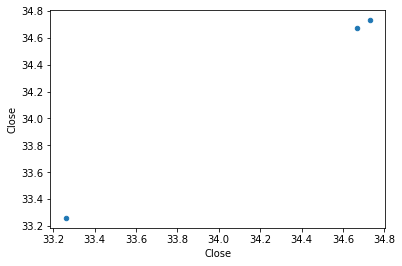

In [ ]:
dados.plot.scatter(x = 'Close', y = 'Close')

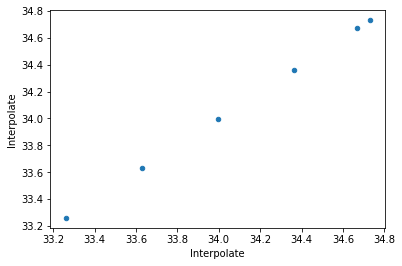

In [ ]:
dados.plot.scatter(x = 'Interpolate', y = 'Interpolate')

### 2.7.3. Visualização para dados de cotações em séries longas

As técnicas utilizadas anteriormente podem ser muito úteis nos mais diversos dataframes e conjuntos de dados.

Pensando em OHLC de séries temporais longas, vejamos um pouco mais essas técnicas

Vamos abrir uma base de dados externa.

Trabalhar NA é uma coisa extramamente importante que merece dedicar tempo.

In [ ]:
dados = pd.read_csv('Bovespa.csv')

In [ ]:
dados.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


Vamos criar um novo dataframe para uma ação específica

In [ ]:
dados.index = pd.to_datetime(dados.Date)

In [ ]:
acao = 'CYRE3'

In [ ]:
CYRE = dados[acao]

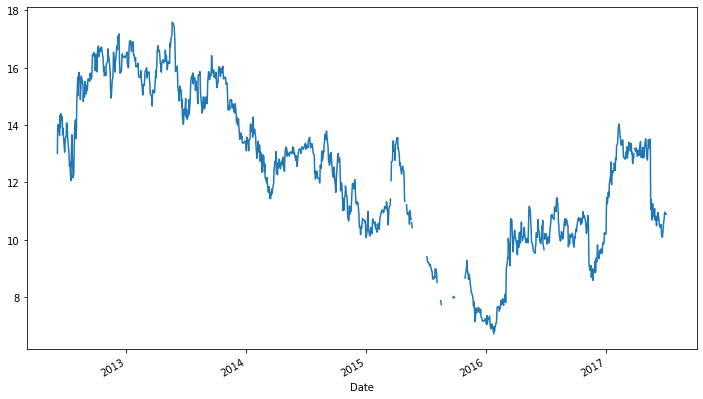

In [ ]:
CYRE.plot(figsize = (12,7));

In [ ]:
CYRE = pd.DataFrame(CYRE)

O preenchimento usando a técnica de **"forward filling"** é normalmente o mais utilizado no mercado financeiro.

In [ ]:
CYRE2 = CYRE.ffill(axis = 0)

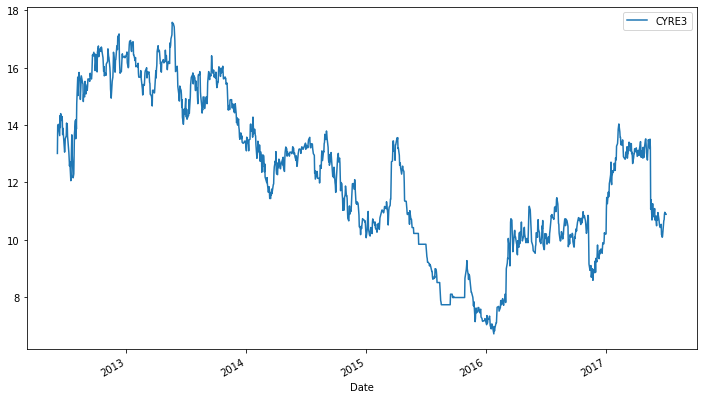

In [ ]:
CYRE2.plot(figsize = (12,7));

In [ ]:
acao = 'WEGE3'

In [ ]:
weg = dados[acao]

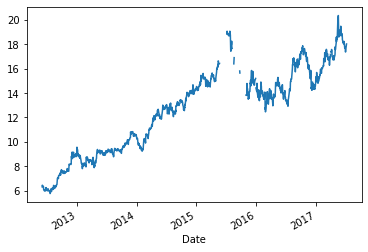

In [ ]:
weg.plot();

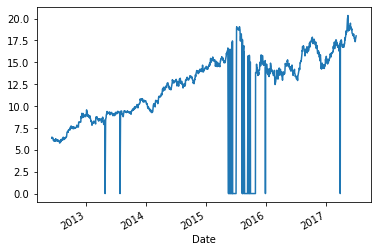

In [ ]:
weg.fillna(0).plot();

Uma outra opção é o preenchimento com a média, o que para dados de mercado financeiro pode não fazer tanto sentido.

In [ ]:
preco_medio = weg.mean()

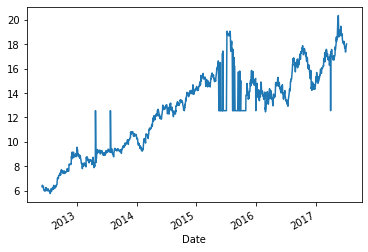

In [ ]:
weg.fillna(preco_medio).plot();

### 2.7.4. Biblioteca missingno

Vamos aprender sobre uma nova biblioteca que tem como objetivo analisar os missings

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

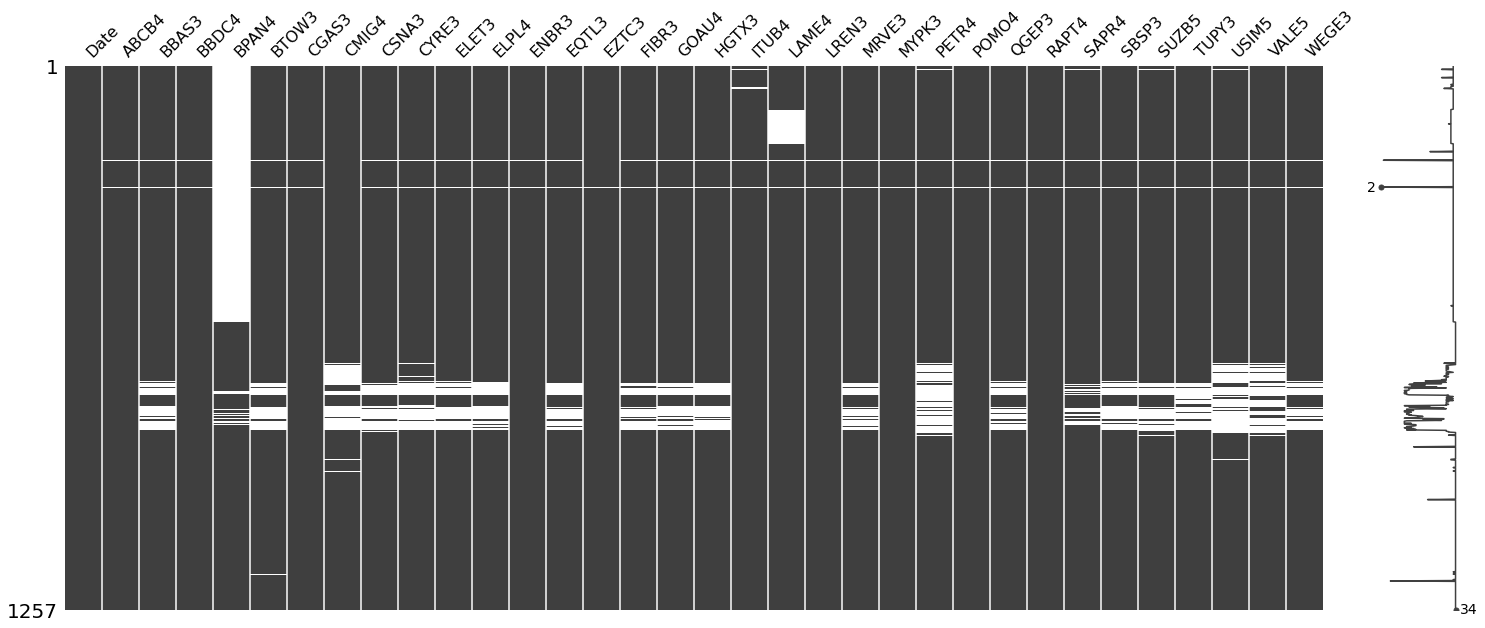

In [ ]:
msno.matrix(dados)

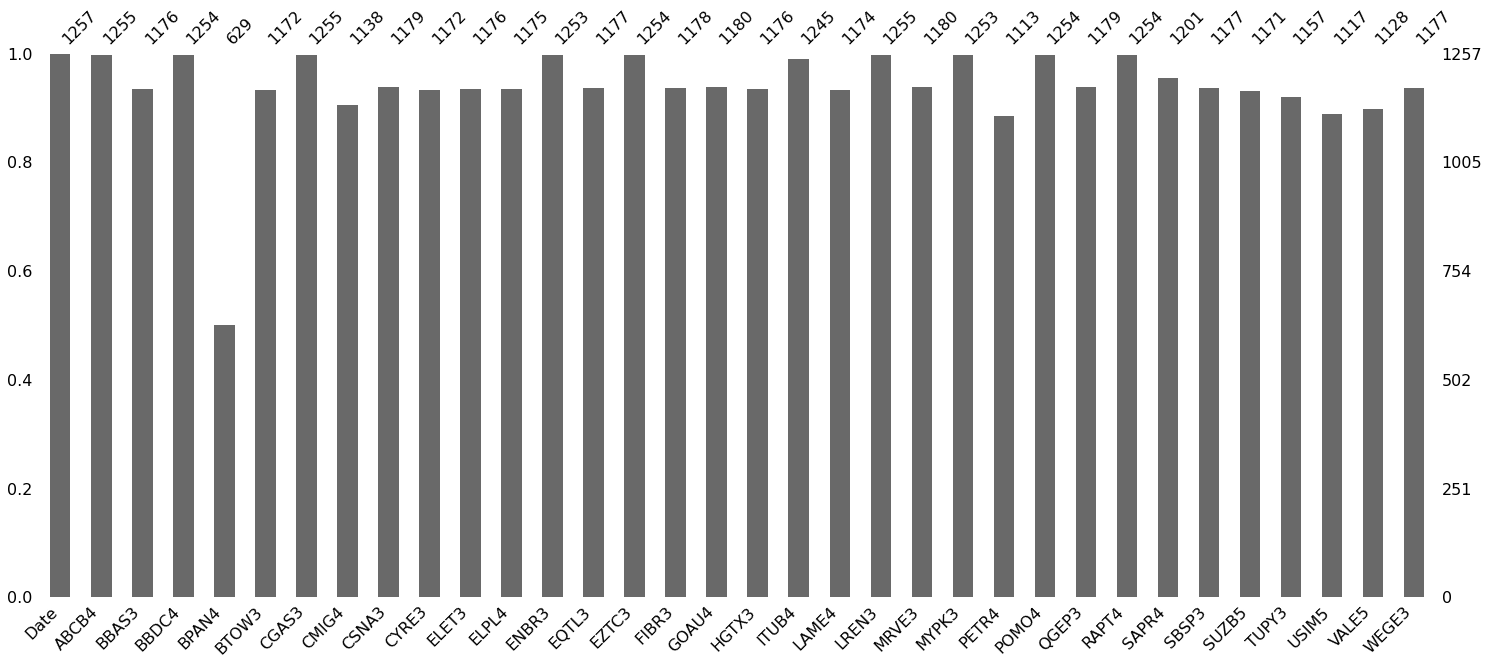

In [ ]:
msno.bar(dados)

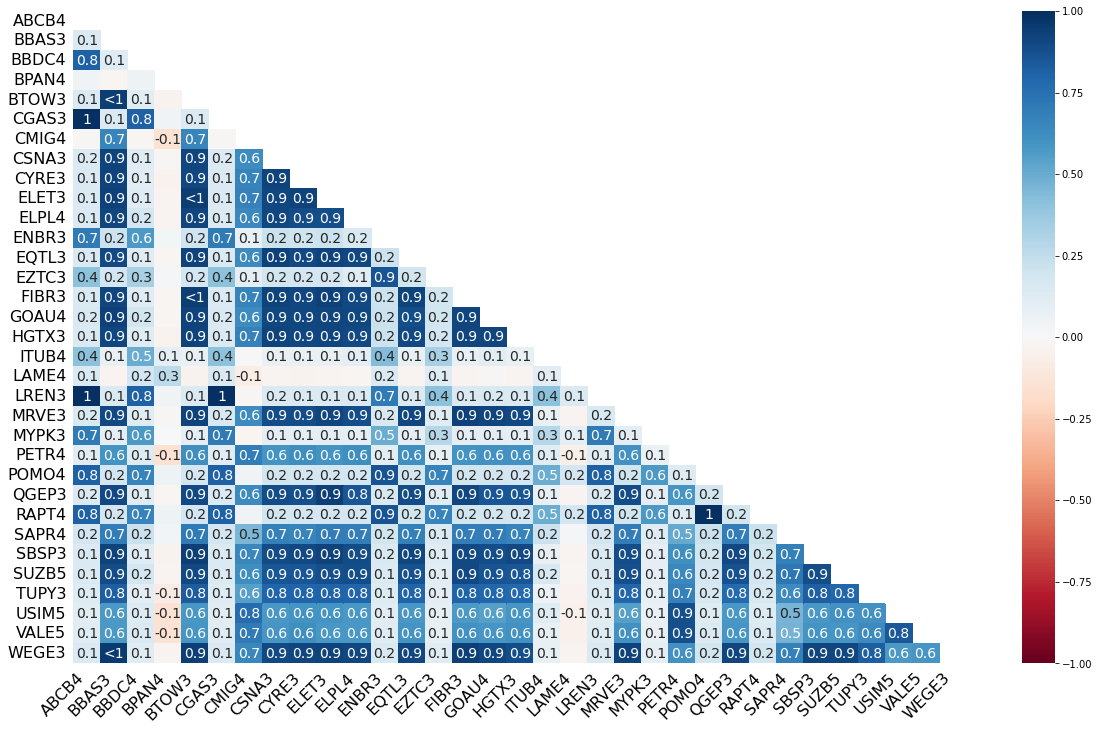

In [ ]:
# Exibe a correlação entre o número de missings
# em diferentes colunas como um mapa de calor (heatmap)

msno.heatmap(dados)

## 2.8. Redução do número de colunas - "Wide to Long"

#### Retomando DF 'cotacoes_ibov'

In [ ]:
cotacoes_ibov

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191311  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.918273  27.293526  13.814717  16.406240  ...   2893300   
2021-12-27  10.851112  27.349573  13.959242  16.593836  ...   7282600   
2021-12-28  10.707198  27.190779  13.950742  16.534149  ...   3367300   
2021-12-29  10.630445  27.050669  13.848725  16.457407  ...   2589100   
2021-12-30  10.688011  26.947922  13.763711  16.380655  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [ ]:
# Apenas execute esta célula caso você esteja reiniciando os estudos e não tenha capturado o dataframe cotacoes_ibov ainda

#import pandas as pd
#cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)
#cotacoes_ibov = cotacoes_csv

#### **Transformação wide to long**

**Melt**

O melt é utilizado na biblioteca pandas para realizar uma transformação que chamamos de "wide to long".

Ou seja, se tivermos um dataframe grande e largo podemos transformá-lo num dataframe longo, com poucas colunas mas com muitas linhas.

O que antes eram as colunas agora viram categorias em colunas novas, as "variáveis", e os valores são todos mostrados na coluna valor, ou "value".

In [ ]:
cotacoes_ibov_longo = pd.melt(cotacoes_ibov, ignore_index = False)

In [ ]:
cotacoes_ibov_longo

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


#### Utilizando filtros de colunas nos DFs melted

In [ ]:
cotacoes_ibov_longo_abev = cotacoes_ibov_longo[ (cotacoes_ibov_longo['variable_0'] == 'Close') & (cotacoes_ibov_longo['variable_1'] == 'ABEV3.SA')]

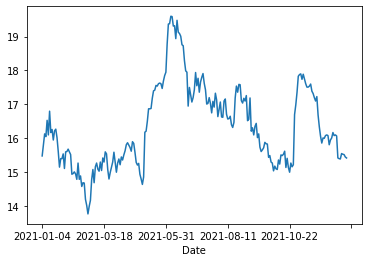

In [ ]:
cotacoes_ibov_longo_abev.value.plot();

In [ ]:
cotacoes_ibov_longo_abev

,variable_0,variable_1,value
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550000
2021-12-27,Close,ABEV3.SA,15.530000
2021-12-28,Close,ABEV3.SA,15.520000


#### Verificando e alterando o nome das colunas

In [ ]:
cotacoes_ibov_longo.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

In [ ]:
cotacoes_ibov_longo.columns = ['Parametro', 'Ativo', 'Valor']

In [ ]:
cotacoes_ibov_longo.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


#### Método 'pivot'

Vamos retornar ao formato padrão

Primeiramente vamos estudar o caso de multi index

In [ ]:
cotacoes_ibov_longo_retorno = cotacoes_ibov_longo.pivot(columns = ['Parametro', 'Ativo'], values = 'Valor')

In [ ]:
cotacoes_ibov_longo_retorno.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Parametro', 'Ativo'], length=546)

In [ ]:
cotacoes_ibov_longo_retorno.head()

Parametro   Adj Close                                                       \
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2021-01-04  14.085717  41.191311  73.699677  65.592361      NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180      NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394      NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226      NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452      NaN  36.599998   

Parametro                                               ...      Volume  \
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800.0   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600.0   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400.0   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300.0   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400.0   

Parametro                                                             \
Ativo        TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   

Parametro                                                 
Ativo         VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  

[5 rows x 546 columns]

In [ ]:
retorno_ibov_ohlc = cotacoes_ibov_longo.pivot(columns = ['Parametro', 'Ativo'])

In [ ]:
retorno_ibov_ohlc['Valor']

Parametro   Adj Close                                                         \
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191311  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

Parametro                                               ...      Volume  \
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800.0   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600.0   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400.0   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300.0   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.918273  27.293526  13.814717  16.406240  ...   2893300.0   
2021-12-27  10.851112  27.349573  13.959242  16.593836  ...   7282600.0   
2021-12-28  10.707198  27.190779  13.950742  16.534149  ...   3367300.0   
2021-12-29  10.630445  27.050669  13.848725  16.457407  ...   2589100.0   
2021-12-30  10.688011  26.947922  13.763711  16.380655  ...   7149400.0   

Parametro                                                             \
Ativo        TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

Parametro                                                 
Ativo         VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  30613400.0  1382200.0   2166400.0  1731000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  20530

#### E caso tivéssemos um DF simples, single index?

In [ ]:
cotacoes_ibov_abev = cotacoes_ibov_longo[cotacoes_ibov_longo['Ativo'] == 'ABEV3.SA']

In [ ]:
cotacoes_ibov_abev

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,ABEV3.SA,1.063470e+07
2021-12-27,Volume,ABEV3.SA,8.437200e+06
2021-12-28,Volume,ABEV3.SA,7.701300e+06


In [ ]:
cotacoes_ibov_abev.pivot(columns = 'Parametro', values = 'Valor')

Parametro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,14.085717,15.480000,15.85,15.380000,15.790000,17835200.0
2021-01-05,14.385996,15.810000,16.02,15.230000,15.370000,37105800.0
2021-01-06,14.677173,16.129999,16.23,15.630000,15.660000,28371600.0
2021-01-07,14.604377,16.049999,16.24,15.910000,16.030001,32540100.0
2021-01-08,15.041145,16.530001,16.75,16.030001,16.100000,30188800.0
...,...,...,...,...,...,...
2021-12-23,14.771684,15.550000,15.67,15.340000,15.400000,10634700.0
2021-12-27,14.752684,15.530000,15.65,15.480000,15.550000,8437200.0
2021-12-28,14.743185,15.520000,15.57,15.400000,15.540000,7701300.0


## 2.9. Filtros mais complexos

#### **Filtros com mais de uma condição**

Vamos criar uma cópia do dataframe original para fazermos algumas práticas de filtros e substituições

In [ ]:
df_cotacoes = cotacoes_ibov_longo.copy()

In [ ]:
df_cotacoes

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
df_cotacoes_adjclose = df_cotacoes[df_cotacoes['variable_0'] == 'Adj Close' ]

In [ ]:
df_cotacoes_adjclose

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,20.177137
2021-12-27,Adj Close,YDUQ3.SA,19.919092
2021-12-28,Adj Close,YDUQ3.SA,20.703154


In [ ]:
df_cotacoes[df_cotacoes.variable_0 == 'Adj Close' ]

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,20.177137
2021-12-27,Adj Close,YDUQ3.SA,19.919092
2021-12-28,Adj Close,YDUQ3.SA,20.703154


Além de filtrar a coluna "variable_0", agora queremos estabelecer um filtro também na coluna "value" queremos selecionar as linhas que possuem valor menor de 10

Por causa da presença do "&", as duas condições precisam ser respeitadas

In [ ]:
df_cotacoes_lowcost = df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 )]

In [ ]:
set(df_cotacoes_lowcost.variable_1)

{'BEEF3.SA',
 'BPAN4.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'POSI3.SA',
 'RAIZ4.SA',
 'VIIA3.SA'}

Cotações maiores que R\$ 8,00 e menores que R$ 10,00

In [ ]:
df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 ) & (df_cotacoes.value > 8 )]

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,BEEF3.SA,8.680282
2021-01-05,Adj Close,BEEF3.SA,8.507367
2021-01-06,Adj Close,BEEF3.SA,8.386327
2021-01-07,Adj Close,BEEF3.SA,8.343099
2021-01-08,Adj Close,BEEF3.SA,8.412264
...,...,...,...
2021-10-06,Adj Close,VIIA3.SA,8.120000
2021-10-08,Adj Close,VIIA3.SA,8.060000
2021-10-13,Adj Close,VIIA3.SA,8.210000


In [ ]:
set(df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 ) & (df_cotacoes.value > 8 )].variable_1)

{'BEEF3.SA',
 'BPAN4.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'POSI3.SA',
 'VIIA3.SA'}

**Exercício**

Calcule a média do volume de negociação de PETR4

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [ ]:
df_cotacoes.mean()

<ipython-input-14-912e3c50ea21>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cotacoes.mean()


value    2.002137e+06
dtype: float64

In [ ]:
df_petro = df_cotacoes[(df_cotacoes['variable_0'] == 'Volume') & (df_cotacoes['variable_1'] == 'PETR4.SA')]

In [ ]:
df_petro.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Volume,PETR4.SA,74719700.0
2021-01-05,Volume,PETR4.SA,95181100.0
2021-01-06,Volume,PETR4.SA,96562500.0
2021-01-07,Volume,PETR4.SA,56171300.0
2021-01-08,Volume,PETR4.SA,67136300.0


In [ ]:
volume_medio = df_petro.value.mean()

In [ ]:
type(volume_medio)

numpy.float64

In [ ]:
df_cotacoes[df_cotacoes.value > df_petro.value.mean()]

,variable_0,variable_1,value
Date,,,
2021-10-28,Volume,ABEV3.SA,91395500.0
2021-02-22,Volume,B3SA3.SA,99958200.0
2021-02-26,Volume,B3SA3.SA,88703700.0
2021-03-02,Volume,B3SA3.SA,107847900.0
2021-03-03,Volume,B3SA3.SA,93766500.0
...,...,...,...
2021-04-27,Volume,VIIA3.SA,84091000.0
2021-06-01,Volume,VIIA3.SA,79602100.0
2021-08-12,Volume,VIIA3.SA,101028200.0


In [ ]:
set(df_cotacoes[df_cotacoes.value > df_petro.value.mean()].variable_1)

{'ABEV3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BRFS3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'MGLU3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'RAIZ4.SA',
 'USIM5.SA',
 'VBBR3.SA',
 'VIIA3.SA'}

#### **Filtros com mais de uma condição, incluindo "ou"**

Vamos complicar um pouco mais

Além do filtro acima, vamos criar um outro filtro onde a coluna variable_0 precisa ser "Adj Close" e o valor precisa ser menor que 10 OU maior que 80

In [ ]:
df_cotacoes[(df_cotacoes.variable_0 == "Adj Close") & ((df_cotacoes.value < 10) | (df_cotacoes.value > 80))]

,variable_0,variable_1,value
Date,,,
2021-01-18,Adj Close,AMER3.SA,80.532433
2021-01-20,Adj Close,AMER3.SA,85.777092
2021-01-21,Adj Close,AMER3.SA,88.022003
2021-01-22,Adj Close,AMER3.SA,87.551445
2021-01-26,Adj Close,AMER3.SA,84.159576
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


#### **Filtro com base em lista**

Vamos selecionar ativos com base em uma lista

Ou seja, precisamos filtrar as linhas de tal forma que contenham apenas os papéis que determinamos na lista

In [ ]:
ativos_churrasco = ['ABEV3.SA','JBSS3.SA','CRFB3.SA','KLBN11.SA','RADL3.SA']

In [ ]:
df_cotacoes_churrasco = df_cotacoes[df_cotacoes.variable_1.isin(ativos_churrasco)]

Como selecionar todos os papéis que não estão na lista?

In [ ]:
alguns_bancos = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BIDI11.SA']

In [ ]:
df_cotacoes_sembancos = df_cotacoes[~df_cotacoes.variable_1.isin(alguns_bancos)]

In [ ]:
df_cotacoes_sembancos

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


#### **Filtro com base em date range**

Vamos lembrar como funciona o .loc

In [ ]:
df_cotacoes.loc['2021-12-30']

,variable_0,variable_1,value
Date,,,
2021-12-30,Adj Close,ABEV3.SA,1.464819e+01
2021-12-30,Adj Close,ALPA4.SA,3.685697e+01
2021-12-30,Adj Close,AMER3.SA,3.095818e+01
2021-12-30,Adj Close,ARZZ3.SA,7.492290e+01
2021-12-30,Adj Close,ASAI3.SA,1.283113e+01
...,...,...,...
2021-12-30,Volume,VBBR3.SA,1.354760e+07
2021-12-30,Volume,VIIA3.SA,5.831040e+07
2021-12-30,Volume,VIVT3.SA,2.392600e+06


Utilizando o operador "date_range" para retornar todas as datas que estão presentes em um intervalo

In [ ]:
ibov_date_range = pd.date_range(start='2021-03-21',end='2021-03-31')

In [ ]:
ibov_date_range

DatetimeIndex(['2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
type(ibov_date_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

,variable_0,variable_1,value
Date,,,


In [ ]:
df_cotacoes.dtypes

variable_0     object
variable_1     object
value         float64
dtype: object

In [ ]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [ ]:
df_cotacoes.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=134862, freq=None)

In [ ]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

,variable_0,variable_1,value
Date,,,
2021-03-22,Adj Close,ABEV3.SA,1.420771e+01
2021-03-23,Adj Close,ABEV3.SA,1.378714e+01
2021-03-24,Adj Close,ABEV3.SA,1.353115e+01
2021-03-25,Adj Close,ABEV3.SA,1.370486e+01
2021-03-26,Adj Close,ABEV3.SA,1.385114e+01
...,...,...,...
2021-03-25,Volume,YDUQ3.SA,2.433000e+06
2021-03-26,Volume,YDUQ3.SA,1.801000e+06
2021-03-29,Volume,YDUQ3.SA,1.223600e+06


#### **Filtro com base em caractere da string**

Lembrando dos operadores de filtros em strings,

veja como fazemos para retornar o quinto caractere do ticker de um papel

In [ ]:
acao = 'PETR4.SA'

In [ ]:
acao[4]

'4'

In [ ]:
acao[-4]

'4'

Dado isso, como podemos fazer para retornar apenas as ações ordinárias, ou seja, que têm final '3'?

In [ ]:
df_cotacoes['variable_1']

Date
2021-01-04    ABEV3.SA
2021-01-05    ABEV3.SA
2021-01-06    ABEV3.SA
2021-01-07    ABEV3.SA
2021-01-08    ABEV3.SA
                ...   
2021-12-23    YDUQ3.SA
2021-12-27    YDUQ3.SA
2021-12-28    YDUQ3.SA
2021-12-29    YDUQ3.SA
2021-12-30    YDUQ3.SA
Name: variable_1, Length: 134862, dtype: object

In [ ]:
df_cotacoes.variable_1.str[-4]

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-12-23    3
2021-12-27    3
2021-12-28    3
2021-12-29    3
2021-12-30    3
Name: variable_1, Length: 134862, dtype: object

In [ ]:
df_cotacoes[df_cotacoes.variable_1.str[-4] == '3'  ]

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
df_cotacoes[df_cotacoes.variable_1.str[-4] == '4'  ]

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ALPA4.SA,4.119131e+01
2021-01-05,Adj Close,ALPA4.SA,4.121109e+01
2021-01-06,Adj Close,ALPA4.SA,3.896609e+01
2021-01-07,Adj Close,ALPA4.SA,3.827380e+01
2021-01-08,Adj Close,ALPA4.SA,4.025177e+01
...,...,...,...
2021-12-23,Volume,RAIZ4.SA,3.174500e+06
2021-12-27,Volume,RAIZ4.SA,4.493500e+06
2021-12-28,Volume,RAIZ4.SA,4.379800e+06


In [ ]:
set(df_cotacoes[df_cotacoes.variable_1.str[-4] == '3'  ].variable_1)

{'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'JBSS3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SBSP3.SA',
 'SLCE3.SA',
 'SMTO3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'VALE3.SA',
 'VBBR3.SA',
 'VIIA3.SA',
 'VIVT3.SA',
 'WEGE3.SA',
 'YDUQ3.SA'}

In [ ]:
set(df_cotacoes[df_cotacoes.variable_1.str[-4] == '4'  ].variable_1)

{'ALPA4.SA',
 'AZUL4.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'CMIG4.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'PETR4.SA',
 'RAIZ4.SA'}

#### **Filtros .where e .mask**

Nesses casos, ao invés de remover os valores que nao obedecem o filtro, as linha/coluna são substituídas por NaN ou pelo valor/str desejado

In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA')

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,NaN,NaN,NaN
2021-12-27,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN


In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA', 0)

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,0,0,0.000000
2021-12-27,0,0,0.000000
2021-12-28,0,0,0.000000


In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA', 'Vazio')

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,Vazio,Vazio,Vazio
2021-12-27,Vazio,Vazio,Vazio
2021-12-28,Vazio,Vazio,Vazio


In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA')

,variable_0,variable_1,value
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA').head()

,variable_0,variable_1,value
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN


In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA').tail()

,variable_0,variable_1,value
Date,,,
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0
2021-12-29,Volume,YDUQ3.SA,1342300.0
2021-12-30,Volume,YDUQ3.SA,2053000.0


## 2.10. Ordenação

Existem métodos diretos para ordenar/classificar índices e colunas

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [ ]:
df_cotacoes.sort_index()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-04,Adj Close,CRFB3.SA,1.773477e+01
2021-01-04,Low,ARZZ3.SA,6.698000e+01
2021-01-04,Low,AMER3.SA,7.385000e+01
2021-01-04,Volume,CCRO3.SA,8.016400e+06
...,...,...,...
2021-12-30,Open,ASAI3.SA,1.290000e+01
2021-12-30,Open,AZUL4.SA,2.410000e+01
2021-12-30,Open,B3SA3.SA,1.115000e+01


Ordem decrescente

In [ ]:
df_cotacoes.sort_index(ascending = False)

,variable_0,variable_1,value
Date,,,
2021-12-30,Volume,YDUQ3.SA,2.053000e+06
2021-12-30,Open,COGN3.SA,2.400000e+00
2021-12-30,Open,CMIG4.SA,1.004615e+01
2021-12-30,Adj Close,PRIO3.SA,2.067000e+01
2021-12-30,Open,CIEL3.SA,2.170000e+00
...,...,...,...
2021-01-04,Open,ASAI3.SA,NaN
2021-01-04,Open,AZUL4.SA,4.000000e+01
2021-01-04,Open,B3SA3.SA,2.071333e+01


E baseando-se em uma ou mais colunas

In [ ]:
df_cotacoes.sort_values('value', ascending = False)

,variable_0,variable_1,value
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
...,...,...,...
2021-07-29,Volume,RAIZ4.SA,NaN
2021-07-30,Volume,RAIZ4.SA,NaN
2021-08-02,Volume,RAIZ4.SA,NaN


In [ ]:
df_cotacoes.sort_values('variable_1', ascending = True)

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-05-11,Volume,ABEV3.SA,2.571930e+07
2021-05-10,Volume,ABEV3.SA,2.935500e+07
2021-05-07,Volume,ABEV3.SA,2.227910e+07
2021-05-06,Volume,ABEV3.SA,7.331120e+07
...,...,...,...
2021-05-07,Low,YDUQ3.SA,2.819000e+01
2021-05-10,Low,YDUQ3.SA,2.843000e+01
2021-05-11,Low,YDUQ3.SA,2.775000e+01


In [ ]:
df_cotacoes.sort_values(['variable_1', 'variable_0'], ascending = True)

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


Em alguns casos, você deseja listar os maiores ou menores valores (ex., top 10 volumes negociados)

In [ ]:
df_volumes = df_cotacoes[df_cotacoes.variable_0 == 'Volume']

In [ ]:
df_volumes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0


In [ ]:
df_volumes.nlargest(10, 'value')

,variable_0,variable_1,value
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
2021-02-26,Volume,PCAR3.SA,232567365.0
2021-08-05,Volume,PETR4.SA,223915900.0
2021-02-19,Volume,PETR4.SA,215834800.0
2021-12-10,Volume,MGLU3.SA,209180700.0


Ou os 5 menores preços de fechamento registrados

In [ ]:
df_close = df_cotacoes[df_cotacoes.variable_0 == 'Close']

In [ ]:
df_close.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001


In [ ]:
df_close.nsmallest(5, 'value')

,variable_0,variable_1,value
Date,,,
2021-12-01,Close,CIEL3.SA,2.01
2021-11-29,Close,CIEL3.SA,2.07
2021-11-30,Close,CIEL3.SA,2.07
2021-11-26,Close,CIEL3.SA,2.08
2021-12-22,Close,CIEL3.SA,2.11


## 2.11. Strings em dataframes

### 2.11.1. Substituição com regex

Imagine que eu quero remover o "SA" do nome dos ativos

In [ ]:
df_cotacoes_copy = df_cotacoes.copy()

In [ ]:
df_cotacoes_copy.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


Nesse caso em especial não teríamos muitos problemas porque o SA está precedido pelo ".". Então bastaria usar o replace ".SA"

Mas para fins didáticos, vamos ignorar o "."

In [ ]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.str.replace("SA", "")

In [ ]:
df_cotacoes_copy.head()

,variable_0,variable_1,value,Ativo
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.


Parece resolvido, mas e se pensarmos em ativos como Banco do Brasil ('BBSA3'), Assaí ('ASAI3'), Itaúsa ('ITSA3')?

In [ ]:
set(df_cotacoes_copy.Ativo)

{'ABEV3.',
 'AI3.',
 'ALPA4.',
 'AMER3.',
 'ARZZ3.',
 'AZUL4.',
 'B33.',
 'BBAS3.',
 'BBDC3.',
 'BBDC4.',
 'BBSE3.',
 'BEEF3.',
 'BPAC11.',
 'BPAN4.',
 'BRAP4.',
 'BRFS3.',
 'BRKM5.',
 'BRML3.',
 'CASH3.',
 'CCRO3.',
 'CIEL3.',
 'CMIG4.',
 'CMIN3.',
 'CN3.',
 'COGN3.',
 'CPFE3.',
 'CPLE6.',
 'CRFB3.',
 'CSNA3.',
 'CVCB3.',
 'CYRE3.',
 'DXCO3.',
 'ECOR3.',
 'EGIE3.',
 'ELET3.',
 'ELET6.',
 'EMBR3.',
 'ENBR3.',
 'ENEV3.',
 'ENGI11.',
 'EQTL3.',
 'EZTC3.',
 'FLRY3.',
 'GGBR4.',
 'GOAU4.',
 'GOLL4.',
 'HAPV3.',
 'HYPE3.',
 'IGTI11.',
 'IRBR3.',
 'IT4.',
 'ITUB4.',
 'JBSS3.',
 'KLBN11.',
 'LREN3.',
 'LW3.',
 'MGLU3.',
 'MRFG3.',
 'MRVE3.',
 'MULT3.',
 'NB11.',
 'NTCO3.',
 'PCAR3.',
 'PETR3.',
 'PETR4.',
 'PETZ3.',
 'POSI3.',
 'PRIO3.',
 'QUAL3.',
 'RADL3.',
 'RAIL3.',
 'RAIZ4.',
 'RDOR3.',
 'RENT3.',
 'RRRP3.',
 'SBSP3.',
 'SLCE3.',
 'SMTO3.',
 'SOMA3.',
 'SUZB3.',
 'TAEE11.',
 'TIMS3.',
 'TOTS3.',
 'UGPA3.',
 'USIM5.',
 'VALE3.',
 'VBBR3.',
 'VIIA3.',
 'VIVT3.',
 'WEGE3.',
 'YDUQ3.'}

Por isso, temos técnicas de susbtituição e localização mais eficientes usando as expressões regulares (regex)

In [ ]:
# Para remover os ".SA" dos tickers, precisamos usar um método chamado "replace"
# Precisamos indicar o que queremos remover e o que virá no lugar
# r'.SA$' nos indica qualquer palavra terminada em .SA


df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.str.replace('.SA$', "", regex = True)

In [ ]:
df_cotacoes_copy.head()

,variable_0,variable_1,value,Ativo
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3


In [ ]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.replace(to_replace = r'.SA$', value = "", regex = True)

In [ ]:
df_cotacoes_copy.replace(to_replace = r'^.SA', value = "", regex = True)

,variable_0,variable_1,value,Ativo
Date,,,,
2021-01-04,Adj Close,ABEV3,1.408572e+01,ABEV3
2021-01-05,Adj Close,ABEV3,1.438600e+01,ABEV3
2021-01-06,Adj Close,ABEV3,1.467717e+01,ABEV3
2021-01-07,Adj Close,ABEV3,1.460438e+01,ABEV3
2021-01-08,Adj Close,ABEV3,1.504115e+01,ABEV3
...,...,...,...,...
2021-12-23,Volume,YDUQ3,1.731000e+06,YDUQ3
2021-12-27,Volume,YDUQ3,1.809000e+06,YDUQ3
2021-12-28,Volume,YDUQ3,1.710500e+06,YDUQ3


In [ ]:
# Para trocar "VIIA" por "VVAR", o raciocínio é o mesmo:
# Nesse caso, ^ para indicar uma string que comece com VIIA


df_cotacoes_alterado = df_cotacoes_copy.replace(to_replace = '^VIIA', value = "VVAR", regex = True)

In [ ]:
set(df_cotacoes_alterado.variable_1)

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3

### 2.11.2. Concatenar e dividir

#### Concatenação

Concatenar strings e indicar um separador desejado

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [ ]:
df_cotacoes['Ativo_Parametro'] = df_cotacoes.variable_1.str.cat(df_cotacoes.variable_0, sep = '_')

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


Exercício

Remova o .SA antes de fazer a concatenação

#### Divisão de strings



Dividir strings e indicar output como listas ou colunas do próprio df

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


In [ ]:
df_cotacoes.Ativo_Parametro.str.split('_')

Date
2021-01-04    [ABEV3.SA, Adj Close]
2021-01-05    [ABEV3.SA, Adj Close]
2021-01-06    [ABEV3.SA, Adj Close]
2021-01-07    [ABEV3.SA, Adj Close]
2021-01-08    [ABEV3.SA, Adj Close]
                      ...          
2021-12-23       [YDUQ3.SA, Volume]
2021-12-27       [YDUQ3.SA, Volume]
2021-12-28       [YDUQ3.SA, Volume]
2021-12-29       [YDUQ3.SA, Volume]
2021-12-30       [YDUQ3.SA, Volume]
Name: Ativo_Parametro, Length: 134862, dtype: object

In [ ]:
df_cotacoes['Colunas_divididas'] = df_cotacoes.Ativo_Parametro.str.split('_')

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value,Ativo_Parametro,Colunas_divididas
Date,,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"


In [ ]:
df_cotacoes[ ['Ativo', 'Parametro'] ] = df_cotacoes.Ativo_Parametro.str.split('_', expand = True)

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value,Ativo_Parametro,Colunas_divididas,Ativo,Parametro
Date,,,,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close


## 2.12. Duplicatas

#### Análise de duplicatas

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [ ]:
df_cotacoes.duplicated().any()

True

Quantas duplicatas aparecem?

In [ ]:
df_cotacoes.duplicated().sum()

18326

Ou seja, então há duplicatas. Vamos fazer uma verificação mais precisa coluna a coluna

In [ ]:
df_cotacoes['variable_0'].duplicated().any()

True

In [ ]:
df_cotacoes['variable_1'].duplicated().any()

True

In [ ]:
df_cotacoes['value'].duplicated().any()

True

In [ ]:
print(df_cotacoes['variable_0'].duplicated().any(),
df_cotacoes['variable_1'].duplicated().any(),
df_cotacoes['value'].duplicated().any())

True True True


Onde estão estas duplicatas?

In [ ]:
df_cotacoes[df_cotacoes.duplicated(keep = False)].tail()

,variable_0,variable_1,value
Date,,,
2021-08-03,Volume,UGPA3.SA,5213500.0
2021-01-13,Volume,VIVT3.SA,2977700.0
2021-10-01,Volume,VIVT3.SA,2977700.0
2021-06-23,Volume,YDUQ3.SA,3250900.0
2021-09-01,Volume,YDUQ3.SA,3250900.0


In [ ]:
df_cotacoes.duplicated(subset = ['variable_0'])

Date
2021-01-04    False
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
              ...  
2021-12-23     True
2021-12-27     True
2021-12-28     True
2021-12-29     True
2021-12-30     True
Length: 134862, dtype: bool

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [ ]:
df_cotacoes.duplicated(subset = ['variable_0', 'variable_1'])

Date
2021-01-04    False
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
              ...  
2021-12-23     True
2021-12-27     True
2021-12-28     True
2021-12-29     True
2021-12-30     True
Length: 134862, dtype: bool

#### Remoção de duplicatas

Caso quiséssemos manter apenas o primeiro valor de cada parametro e ativo

In [ ]:
sem_duplicatas_first = df_cotacoes.drop_duplicates(subset = ['variable_0', 'variable_1'], keep = 'first')

In [ ]:
sem_duplicatas_first.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-04,Adj Close,ALPA4.SA,41.191311
2021-01-04,Adj Close,AMER3.SA,73.699677
2021-01-04,Adj Close,ARZZ3.SA,65.592361
2021-01-04,Adj Close,ASAI3.SA,NaN


Outra forma de remover duplicatas é usando o .unique Nesse caso, ele retorna um array e não um filtro de duplicatas do df

In [ ]:
df_cotacoes.variable_1.unique()

array(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'CASH3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
       'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA', 'RRRP3.SA', 'SA

## 2.13. Drop

In [ ]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


Embora já tenhamos utilizado antes, vamos explorar o drop um pouco mais pois merece atenção.

Trata-se da função que deve ser utilizada quando precisamos remover linhas ou colunas

In [ ]:
df_cotacoes.index

Index(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       ...
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Date', length=134862)

In [ ]:
# Suponha que você quer remover três datas:

data01 = '2021-01-04'
data02 = '2021-01-06'
data03 = '2021-01-12'

In [ ]:
type(data01)

str

In [ ]:
df_cotacoes.drop([data01, data02, data03])

,variable_0,variable_1,value
Date,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


Agora, vamos ver uma situação onde o formato 'datetime' está presente

In [ ]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [ ]:
df_cotacoes.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=134862, freq=None)

O seguinte comando vai resultar em erro pois o index tem formato 'datetime' e as datas passadas são 'str'

In [ ]:
df_cotacoes.drop([data01, data02, data03])

KeyError: ignored

In [ ]:
data01 = pd.to_datetime('2021-01-04')
data02 = pd.to_datetime('2021-01-06')
data03 = pd.to_datetime('2021-01-12')

In [ ]:
df_cotacoes.drop([data01, data02, data03])

,variable_0,variable_1,value
Date,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


Podemos também remover colunas, pelo nome:

In [ ]:
df_cotacoes.drop(['value'], axis = 1).head()

,variable_0,variable_1
Date,,
2021-01-04,Adj Close,ABEV3.SA
2021-01-05,Adj Close,ABEV3.SA
2021-01-06,Adj Close,ABEV3.SA
2021-01-07,Adj Close,ABEV3.SA
2021-01-08,Adj Close,ABEV3.SA


In [ ]:
df_cotacoes

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


Podemos remover pelo índice

In [ ]:
df_cotacoes.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

In [ ]:
df_cotacoes.columns[[0,2]]

Index(['variable_0', 'value'], dtype='object')

In [ ]:
df_cotacoes.drop(df_cotacoes.columns[[0,2]], axis = 1)

,variable_1
Date,
2021-01-04,ABEV3.SA
2021-01-05,ABEV3.SA
2021-01-06,ABEV3.SA
2021-01-07,ABEV3.SA
2021-01-08,ABEV3.SA
...,...
2021-12-23,YDUQ3.SA
2021-12-27,YDUQ3.SA
2021-12-28,YDUQ3.SA


## 2.14. Distribuição de dados em grupos

In [ ]:
import pandas as pd

In [ ]:
petr = pd.read_csv('PETR4.csv', index_col = 'Date')

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [ ]:
petr.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
       '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19'],
      dtype='object', name='Date', length=5770)

Filtrar apenas o ano de 2021

In [ ]:
datas = pd.date_range(start = '2021-01-01', end = '2021-12-31')

In [ ]:
petr[petr.index.isin(datas) ]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Converter o índice para datetime

In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr = petr[petr.index.isin(datas) ]

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300


Agora vamos criar uma nova coluna que determina o resultado do pregão

In [ ]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732


Poderia dividí-los em positivo x negativo

In [ ]:
import numpy as np

In [ ]:
petr['Resultado_binario'] = np.where(petr['Resultado%'] > 0, 'Positivo', 'Negativo')

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario
Date,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo


In [ ]:
petr.tail()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario
Date,,,,,,,,
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600,0.000000,Negativo
2021-12-27,28.320000,28.780001,28.150000,28.750000,16.801609,44227900,1.518363,Positivo
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100,-0.792828,Negativo
2021-12-29,28.700001,28.900000,28.420000,28.540001,16.678883,35508400,-0.557491,Negativo
2021-12-30,28.549999,28.700001,28.389999,28.450001,16.626287,43229100,-0.350257,Negativo


Vamos contar quantos dias tivemos resultados positivos ou negativos

In [ ]:
len(petr[petr['Resultado_binario'] == 'Positivo'])

119

In [ ]:
len(petr[petr['Resultado_binario'] == 'Negativo'])

128

Veja que tivemos mais dias negativos que positivos.

E se quisessemos encontrar um jeito de dividir os dados em dois grupos de mesmo tamanho?

In [ ]:
pd.cut(petr['Resultado%'], 2)

Date
2021-01-04     (-0.722, 5.795]
2021-01-05     (-0.722, 5.795]
2021-01-06     (-0.722, 5.795]
2021-01-07     (-0.722, 5.795]
2021-01-08    (-7.253, -0.722]
                    ...       
2021-12-23     (-0.722, 5.795]
2021-12-27     (-0.722, 5.795]
2021-12-28    (-7.253, -0.722]
2021-12-29     (-0.722, 5.795]
2021-12-30     (-0.722, 5.795]
Name: Resultado%, Length: 247, dtype: category
Categories (2, interval[float64, right]): [(-7.253, -0.722] < (-0.722, 5.795]]

In [ ]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2)

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,"(-0.722, 5.795]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,"(-0.722, 5.795]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,"(-0.722, 5.795]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,"(-0.722, 5.795]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,"(-7.253, -0.722]"


É possível também nomear as classes/categorias

In [ ]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2, labels = ['piores_dias', 'melhores_dias'])

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias


Podemos determinar os intervalos

In [ ]:
lista_intervalos = [(-50, -2), (-2, -1), (-1, 1), (1, 2), (2, 50)]

In [ ]:
bins = pd.IntervalIndex.from_tuples(lista_intervalos)

In [ ]:
petr['Grupos_pre_definidos'] = pd.cut(petr['Resultado%'], bins)

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias,"(2, 50]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias,"(2, 50]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias,"(-2, -1]"


In [ ]:
petr.dtypes

Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Resultado%               float64
Resultado_binario         object
Grupos_mesmo_tamanho    category
Grupos_pre_definidos    category
dtype: object

In [ ]:
petr.Grupos_pre_definidos.value_counts()

(-1, 1]      117
(1, 2]        35
(-50, -2]     34
(-2, -1]      31
(2, 50]       30
Name: Grupos_pre_definidos, dtype: int64

In [ ]:
petr[petr['Resultado%'].between(-1,1)]

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-06,30.160000,30.900000,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-11,30.610001,31.059999,30.400000,30.860001,14.658461,48744700,0.816727,Positivo,melhores_dias,"(-1, 1]"
2021-01-14,29.170000,29.670000,28.719999,29.450001,13.988713,50745400,0.959893,Positivo,melhores_dias,"(-1, 1]"
2021-01-18,28.309999,28.850000,28.010000,28.070000,13.333213,68855700,-0.847756,Negativo,piores_dias,"(-1, 1]"
...,...,...,...,...,...,...,...,...,...,...
2021-12-22,28.400000,28.400000,27.969999,28.160000,16.456808,33734500,-0.845070,Negativo,piores_dias,"(-1, 1]"
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600,0.000000,Negativo,melhores_dias,"(-1, 1]"
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100,-0.792828,Negativo,piores_dias,"(-1, 1]"


## 2.15. Formatação de dataframes e modificação do estilo

In [ ]:
import pandas as pd

In [ ]:
petr = pd.read_csv('PETR4.csv', index_col='Date')

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr = petr[petr.index >= '2022-12']

In [ ]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

In [ ]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2022-12-01,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


In [ ]:
petr.insert(0, 'Ativo', 'PETR4')

In [ ]:
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,PETR4,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,PETR4,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,PETR4,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,PETR4,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


Arredondar os dados OHLC seria o primeiro passo de formatação a se pensar

In [ ]:
preco = 29.893042480

In [ ]:
round(preco, 2)

29.89

In [ ]:
round(petr, 2)

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,PETR4,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,PETR4,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,PETR4,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,PETR4,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


Apresentando o método apply

In [ ]:
lambda x: round(x,2)

<function __main__.<lambda>(x)>

In [ ]:
petr.apply(lambda x: round(x,2))

TypeError: ignored

Como temos a coluna ativo que é str teremos problemas

In [ ]:
petr.iloc[:, 1:] = petr.iloc[:, 1:].apply(lambda x: round(x,2))

In [ ]:
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,PETR4,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,PETR4,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,PETR4,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,PETR4,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


Vamos aprender sobre o operador %f no Python, que serve para ajustar a formatação da exibição de números (floats)


Exemplo

In [ ]:
x = 15.8383903

In [ ]:
print('O número é', x)

O número é 15.8383903


In [ ]:
print('%.1f' % x)

15.8


In [ ]:
print('%.2f' % x)

15.84


In [ ]:
print('O número é %.2f' % x)

O número é 15.84


In [ ]:
'O número é %.2f' % x

'O número é 15.84'

Basta lembrar dos parâmetros

**%:** determina que há uma configuração de formatação

**.1f:** 1 dígito depois do separador decimal

**% x:** exibe a variável com a formatação referida

Outra forma seria editando as opções dos objetos pandas como um todo. Funciona como um inplace, depois precisará reiniciar o kernel para cancelar

In [ ]:
pd.set_option('display.float_format', lambda x:  '%.3f' % x)

In [ ]:
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580,26.790,25.560,25.590,25.590,71259400,-3.725
2022-12-02,PETR4,25.690,26.450,25.310,25.910,25.910,66301000,0.856
2022-12-05,PETR4,26.000,26.580,25.550,25.620,25.620,56065400,-1.462
2022-12-06,PETR4,25.820,26.390,25.420,25.640,25.640,74991200,-0.697
2022-12-07,PETR4,25.340,26.070,25.270,25.350,25.350,57008400,0.039


#### Método style

In [ ]:
petr.style.format('{:.1f}', subset = ['Adj Close', 'Resultado%'])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.580000,26.790001,25.559999,25.590000,25.6,71259400,-3.7
2022-12-02 00:00:00,PETR4,25.690001,26.450001,25.309999,25.910000,25.9,66301000,0.9
2022-12-05 00:00:00,PETR4,26.000000,26.580000,25.549999,25.620001,25.6,56065400,-1.5
2022-12-06 00:00:00,PETR4,25.820000,26.389999,25.420000,25.639999,25.6,74991200,-0.7
2022-12-07 00:00:00,PETR4,25.340000,26.070000,25.270000,25.350000,25.4,57008400,0.0
2022-12-08 00:00:00,PETR4,25.549999,25.790001,24.639999,24.780001,24.8,55567700,-3.0
2022-12-09 00:00:00,PETR4,24.990000,25.049999,24.490000,24.709999,24.7,61586200,-1.1
2022-12-12 00:00:00,PETR4,24.580000,24.660000,23.129999,23.910000,23.9,111293100,-2.7
2022-12-13 00:00:00,PETR4,24.100000,24.200001,23.309999,23.320000,23.3,102533100,-3.2


Vamos criar uma estrutura de repetição para detectar quais são as colunas do tipo 'float'

In [ ]:
import numpy as np

In [ ]:
len(petr.columns)

8

In [ ]:
range(0, len(petr.columns))

range(0, 8)

In [ ]:
list(range(0, len(petr.columns)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
lista_colunas_float = []

In [ ]:
for i in range(0, len(petr.columns)):
  if type(petr.iloc[1, i]) == np.float64:
    lista_colunas_float.append(i)

In [ ]:
lista_colunas_float

[1, 2, 3, 4, 5, 7]

Vamos implementar na prática

In [ ]:
petr.columns[lista_colunas_float]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Resultado%'], dtype='object')

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(color = 'red')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(subset = ['Resultado%'],color = 'green')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_min(subset = ['Resultado%'],color = 'red')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


Vamos conhecer o método background_gradient

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'YlOrRd')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


Mapa de cores da matplotlib

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'RdYlGn')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [ ]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 14pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: purple; color: black; font-size: 14pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 11pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 15pt"}])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24
